<a href="https://colab.research.google.com/github/Nagu34/Thesis/blob/main/Emotion_Dataset_augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#package imports
import os
import random
import sys
import glob 
import keras

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

## extra added 
import pandas as pd
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from scipy import stats
import warnings
import seaborn as sns
import multiprocessing as mp
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from scipy import stats
import warnings
import seaborn as sns
import multiprocessing as mp
%matplotlib inline

In [ ]:
src_path="/content/drive/MyDrive/emotion/audio"
target_dir="/content/drive/MyDrive/emotion/audio_augmentations"
dir_list=os.listdir(src_path)
dir_list.sort()
for sound_files in tqdm(dir_list):
    #print(sound_files)
     sound_file= sound_files.split('.')[0].split('-')
    #print(emotion_file)
     path= src_path + '/' + sound_files
     #data, sample_rate = read_audio_file(path)
     data,sample_rate = librosa.core.load(path)
     data_noise = add_noise(data)
     outfile = sound_files.split('.')[0] + "-" + "aug" + ".wav"
     outfile = target_dir + '/' + outfile
     write_audio_file(outfile, data_noise,sample_rate)
     data_roll = shift(data,sample_rate)
     outfile = sound_files.split('.')[0] + "-" + "aug1" + ".wav"
     outfile = target_dir + '/' + outfile
     write_audio_file(outfile, data_roll,sample_rate)
     # change of pitch the sound
     data_pitch = pitch(data)
     outfile = sound_files.split('.')[0] + "-" + "aug2" + ".wav"
     outfile = target_dir + '/' + outfile
     write_audio_file(outfile, data_pitch,sample_rate)
     #change of dynamic range
     data_range = range(data_pitch)
     outfile = sound_files.split('.')[0] + "-" + "aug3" + ".wav"
     outfile = target_dir + '/' + outfile
     write_audio_file(outfile, data_range,sample_rate)

100%|██████████| 1440/1440 [10:39<00:00,  2.25it/s]


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


def add_noise(data):
        data_noise = data + 0.009*np.random.normal(0,1,len(data))
        return data_noise
def shift(data,sample_rate):
        return np.roll(data,int(sample_rate/10))
def pitch(y):
    y_mod=y
    length_change = np.random.uniform(low=0.9,high=1.1)
    speed_fac = 1.0  / length_change
    #print(tab+"    resample length_change = ",length_change)
    tmp = np.interp(np.arange(0,len(y),speed_fac),np.arange(0,len(y)),y)
    #tmp = resample(y,int(length*lengt_fac))    # signal.resample is too slow
    minlen = min( y.shape[0], tmp.shape[0])     # keep same length as original; 
    y_mod *= 0                                    # pad with zeros 
    y_mod[0:minlen] = tmp[0:minlen]
    return y_mod
def range(y_mod):
    dyn_change = np.random.uniform(low=0.5,high=1.1)  # change amplitude
    #print(tab+"    dyn_change = ",dyn_change)
    y_mod = y_mod * dyn_change
    return y_mod
def write_audio_file(file, data, sample_rate):
        librosa.output.write_wav(file, data, sample_rate)

In [ ]:
import numpy as np
max_pad_len = 228
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        print(mfccs.shape[1])
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [ ]:
mfccs=extract_features("/content/drive/MyDrive/emotion/audio_augmentations/03-01-02-02-01-02-01-aug2.wav")

173


In [ ]:
src_path="/content/drive/MyDrive/emotion/audio"

In [ ]:
data_df = pd.DataFrame(columns=['path','sound'])
count=0
features=[]
dir_list=os.listdir(src_path)
dir_list.sort()
for sound_files in tqdm(dir_list):
    #print(sound_files)
     sound_file= sound_files.split('.')[0].split('-')
    #print(emotion_file)
     path= src_path + '/' + sound_files
    #print(path)
     file_name=os.path.abspath(path)
     data = extract_features(file_name)
     sound=int(sound_file[2])
     features.append([data, sound])
    #print(emotion)
     data_df.loc[count] = [path,sound]
     count += 1
    #print("------------------------------")
    #print("++++++++++++++++++++++++++++++++++++++++++++++")
featuresdf = pd.DataFrame(features, columns=['feature','sound'])
featuresdf.to_pickle('/content/drive/MyDrive/emotion/emotion_mfcc.pkl')

  0%|          | 1/1440 [00:00<18:20,  1.31it/s]

143


  0%|          | 2/1440 [00:01<14:38,  1.64it/s]

157


  0%|          | 3/1440 [00:01<11:50,  2.02it/s]

149


  0%|          | 4/1440 [00:01<09:52,  2.43it/s]

143


  0%|          | 5/1440 [00:01<08:30,  2.81it/s]

156


  0%|          | 6/1440 [00:01<07:32,  3.17it/s]

144


  0%|          | 7/1440 [00:02<07:00,  3.41it/s]

169


  1%|          | 8/1440 [00:02<06:30,  3.67it/s]

151


  1%|          | 9/1440 [00:02<06:12,  3.84it/s]

141


  1%|          | 10/1440 [00:02<06:01,  3.96it/s]

153


  1%|          | 11/1440 [00:03<05:48,  4.10it/s]

136


  1%|          | 12/1440 [00:03<05:45,  4.14it/s]

157


  1%|          | 13/1440 [00:03<05:37,  4.22it/s]

137


  1%|          | 14/1440 [00:03<05:33,  4.27it/s]

150


  1%|          | 15/1440 [00:03<05:38,  4.21it/s]

146


  1%|          | 16/1440 [00:04<05:35,  4.25it/s]

161


  1%|          | 17/1440 [00:04<05:30,  4.30it/s]

166


  1%|▏         | 18/1440 [00:04<05:26,  4.35it/s]

150


  1%|▏         | 19/1440 [00:04<05:24,  4.38it/s]

146


  1%|▏         | 20/1440 [00:05<05:24,  4.38it/s]

150


  1%|▏         | 21/1440 [00:05<05:24,  4.37it/s]

166


  2%|▏         | 22/1440 [00:05<05:22,  4.39it/s]

157


  2%|▏         | 23/1440 [00:05<05:22,  4.39it/s]

164


  2%|▏         | 24/1440 [00:06<05:26,  4.34it/s]

160


  2%|▏         | 25/1440 [00:06<05:19,  4.42it/s]

144


  2%|▏         | 26/1440 [00:06<05:16,  4.47it/s]

156


  2%|▏         | 27/1440 [00:06<05:16,  4.46it/s]

151


  2%|▏         | 28/1440 [00:06<05:17,  4.45it/s]

146


  2%|▏         | 29/1440 [00:07<05:20,  4.40it/s]

157


  2%|▏         | 30/1440 [00:07<05:22,  4.38it/s]

156


  2%|▏         | 31/1440 [00:07<05:20,  4.39it/s]

164


  2%|▏         | 32/1440 [00:07<05:22,  4.37it/s]

157


  2%|▏         | 33/1440 [00:08<05:22,  4.36it/s]

138


  2%|▏         | 34/1440 [00:08<05:23,  4.34it/s]

166


  2%|▏         | 35/1440 [00:08<05:18,  4.41it/s]

134


  2%|▎         | 36/1440 [00:08<05:17,  4.42it/s]

153


  3%|▎         | 37/1440 [00:08<05:16,  4.44it/s]

138


  3%|▎         | 38/1440 [00:09<05:23,  4.34it/s]

144


  3%|▎         | 39/1440 [00:09<05:20,  4.38it/s]

149


  3%|▎         | 40/1440 [00:09<05:18,  4.40it/s]

161


  3%|▎         | 41/1440 [00:09<05:19,  4.38it/s]

151


  3%|▎         | 42/1440 [00:10<05:23,  4.33it/s]

153


  3%|▎         | 43/1440 [00:10<05:18,  4.39it/s]

140


  3%|▎         | 44/1440 [00:10<05:16,  4.41it/s]

154


  3%|▎         | 45/1440 [00:10<05:18,  4.38it/s]

172


  3%|▎         | 46/1440 [00:11<05:14,  4.44it/s]

149


  3%|▎         | 47/1440 [00:11<05:17,  4.38it/s]

161


  3%|▎         | 48/1440 [00:11<05:15,  4.42it/s]

157


  3%|▎         | 49/1440 [00:11<05:11,  4.47it/s]

141


  3%|▎         | 50/1440 [00:11<05:15,  4.41it/s]

163


  4%|▎         | 51/1440 [00:12<05:15,  4.40it/s]

151


  4%|▎         | 52/1440 [00:12<05:15,  4.40it/s]

141


  4%|▎         | 53/1440 [00:12<05:12,  4.44it/s]

134


  4%|▍         | 54/1440 [00:12<05:13,  4.42it/s]

147


  4%|▍         | 55/1440 [00:13<05:22,  4.30it/s]

179


  4%|▍         | 56/1440 [00:13<05:25,  4.25it/s]

153


  4%|▍         | 57/1440 [00:13<05:18,  4.35it/s]

144


  4%|▍         | 58/1440 [00:13<05:15,  4.38it/s]

161


  4%|▍         | 59/1440 [00:14<05:17,  4.35it/s]

138


  4%|▍         | 60/1440 [00:14<05:18,  4.34it/s]

156


  4%|▍         | 61/1440 [00:14<05:14,  4.38it/s]

133


  4%|▍         | 62/1440 [00:14<05:16,  4.36it/s]

150


  4%|▍         | 63/1440 [00:14<05:12,  4.41it/s]

149


  4%|▍         | 64/1440 [00:15<05:13,  4.39it/s]

156


  5%|▍         | 65/1440 [00:15<05:13,  4.38it/s]

151


  5%|▍         | 66/1440 [00:15<05:12,  4.40it/s]

150


  5%|▍         | 67/1440 [00:15<05:11,  4.41it/s]

144


  5%|▍         | 68/1440 [00:16<05:10,  4.42it/s]

149


  5%|▍         | 69/1440 [00:16<05:15,  4.34it/s]

156


  5%|▍         | 70/1440 [00:16<05:15,  4.34it/s]

156


  5%|▍         | 71/1440 [00:16<05:13,  4.36it/s]

159


  5%|▌         | 72/1440 [00:16<05:15,  4.33it/s]

157


  5%|▌         | 73/1440 [00:17<05:17,  4.31it/s]

137


  5%|▌         | 74/1440 [00:17<05:15,  4.33it/s]

156


  5%|▌         | 75/1440 [00:17<05:14,  4.35it/s]

150


  5%|▌         | 76/1440 [00:17<05:11,  4.39it/s]

140


  5%|▌         | 77/1440 [00:18<05:07,  4.43it/s]

156


  5%|▌         | 78/1440 [00:18<05:08,  4.42it/s]

149


  5%|▌         | 79/1440 [00:18<05:11,  4.37it/s]

161


  6%|▌         | 80/1440 [00:18<05:15,  4.31it/s]

151


  6%|▌         | 81/1440 [00:19<05:11,  4.36it/s]

140


  6%|▌         | 82/1440 [00:19<05:15,  4.31it/s]

159


  6%|▌         | 83/1440 [00:19<05:09,  4.39it/s]

137


  6%|▌         | 84/1440 [00:19<05:07,  4.41it/s]

157


  6%|▌         | 85/1440 [00:19<05:02,  4.48it/s]

136


  6%|▌         | 86/1440 [00:20<05:07,  4.40it/s]

154


  6%|▌         | 87/1440 [00:20<05:11,  4.35it/s]

147


  6%|▌         | 88/1440 [00:20<05:12,  4.32it/s]

154


  6%|▌         | 89/1440 [00:20<05:13,  4.31it/s]

150


  6%|▋         | 90/1440 [00:21<05:20,  4.21it/s]

150


  6%|▋         | 91/1440 [00:21<05:20,  4.20it/s]

143


  6%|▋         | 92/1440 [00:21<05:21,  4.19it/s]

153


  6%|▋         | 93/1440 [00:21<05:20,  4.20it/s]

159


  7%|▋         | 94/1440 [00:22<05:20,  4.20it/s]

153


  7%|▋         | 95/1440 [00:22<05:23,  4.16it/s]

166


  7%|▋         | 96/1440 [00:22<05:18,  4.21it/s]

156


  7%|▋         | 97/1440 [00:22<05:18,  4.22it/s]

153


  7%|▋         | 98/1440 [00:23<05:17,  4.22it/s]

166


  7%|▋         | 99/1440 [00:23<05:17,  4.22it/s]

166


  7%|▋         | 100/1440 [00:23<05:19,  4.20it/s]

164


  7%|▋         | 101/1440 [00:23<05:21,  4.16it/s]

174


  7%|▋         | 102/1440 [00:24<05:22,  4.15it/s]

174


  7%|▋         | 103/1440 [00:24<05:20,  4.17it/s]

150


  7%|▋         | 104/1440 [00:24<05:24,  4.11it/s]

156


  7%|▋         | 105/1440 [00:24<05:21,  4.16it/s]

144


  7%|▋         | 106/1440 [00:24<05:17,  4.20it/s]

154


  7%|▋         | 107/1440 [00:25<05:12,  4.26it/s]

141


  8%|▊         | 108/1440 [00:25<05:16,  4.21it/s]

167


  8%|▊         | 109/1440 [00:25<05:10,  4.29it/s]

143


  8%|▊         | 110/1440 [00:25<05:09,  4.30it/s]

161


  8%|▊         | 111/1440 [00:26<05:08,  4.31it/s]

154


  8%|▊         | 112/1440 [00:26<05:12,  4.25it/s]

160


  8%|▊         | 113/1440 [00:26<05:09,  4.28it/s]

151


  8%|▊         | 114/1440 [00:26<05:10,  4.27it/s]

150


  8%|▊         | 115/1440 [00:27<05:06,  4.32it/s]

159


  8%|▊         | 116/1440 [00:27<05:05,  4.34it/s]

157


  8%|▊         | 117/1440 [00:27<05:10,  4.26it/s]

174


  8%|▊         | 118/1440 [00:27<05:06,  4.31it/s]

153


  8%|▊         | 119/1440 [00:27<05:07,  4.29it/s]

172


  8%|▊         | 120/1440 [00:28<05:04,  4.33it/s]

154


  8%|▊         | 121/1440 [00:28<05:07,  4.30it/s]

156


  8%|▊         | 122/1440 [00:28<05:11,  4.24it/s]

173


  9%|▊         | 123/1440 [00:28<05:08,  4.27it/s]

161


  9%|▊         | 124/1440 [00:29<05:07,  4.28it/s]

161


  9%|▊         | 125/1440 [00:29<05:10,  4.24it/s]

177


  9%|▉         | 126/1440 [00:29<05:13,  4.20it/s]

177


  9%|▉         | 127/1440 [00:29<05:12,  4.20it/s]

161


  9%|▉         | 128/1440 [00:30<05:05,  4.29it/s]

147


  9%|▉         | 129/1440 [00:30<05:01,  4.34it/s]

144


  9%|▉         | 130/1440 [00:30<05:00,  4.35it/s]

156


  9%|▉         | 131/1440 [00:30<05:02,  4.32it/s]

144


  9%|▉         | 132/1440 [00:31<05:04,  4.29it/s]

163


  9%|▉         | 133/1440 [00:31<05:04,  4.29it/s]

137


  9%|▉         | 134/1440 [00:31<05:07,  4.25it/s]

154


  9%|▉         | 135/1440 [00:31<05:06,  4.26it/s]

154


  9%|▉         | 136/1440 [00:31<05:07,  4.24it/s]

167


 10%|▉         | 137/1440 [00:32<05:08,  4.23it/s]

153


 10%|▉         | 138/1440 [00:32<05:04,  4.28it/s]

147


 10%|▉         | 139/1440 [00:32<05:06,  4.25it/s]

159


 10%|▉         | 140/1440 [00:32<05:02,  4.29it/s]

154


 10%|▉         | 141/1440 [00:33<05:02,  4.29it/s]

173


 10%|▉         | 142/1440 [00:33<04:58,  4.34it/s]

154


 10%|▉         | 143/1440 [00:33<05:05,  4.24it/s]

176


 10%|█         | 144/1440 [00:33<05:01,  4.30it/s]

151


 10%|█         | 145/1440 [00:34<04:57,  4.36it/s]

151


 10%|█         | 146/1440 [00:34<05:00,  4.31it/s]

166


 10%|█         | 147/1440 [00:34<05:01,  4.29it/s]

166


 10%|█         | 148/1440 [00:34<05:04,  4.24it/s]

157


 10%|█         | 149/1440 [00:35<05:04,  4.24it/s]

179


 10%|█         | 150/1440 [00:35<05:03,  4.25it/s]

172


 10%|█         | 151/1440 [00:35<04:57,  4.33it/s]

151


 11%|█         | 152/1440 [00:35<04:59,  4.30it/s]

150


 11%|█         | 153/1440 [00:35<05:00,  4.29it/s]

150


 11%|█         | 154/1440 [00:36<04:56,  4.33it/s]

157


 11%|█         | 155/1440 [00:36<04:51,  4.40it/s]

144


 11%|█         | 156/1440 [00:36<04:52,  4.39it/s]

163


 11%|█         | 157/1440 [00:36<04:50,  4.41it/s]

136


 11%|█         | 158/1440 [00:37<04:49,  4.43it/s]

147


 11%|█         | 159/1440 [00:37<04:53,  4.36it/s]

161


 11%|█         | 160/1440 [00:37<04:53,  4.36it/s]

164


 11%|█         | 161/1440 [00:37<04:55,  4.32it/s]

161


 11%|█▏        | 162/1440 [00:37<04:55,  4.33it/s]

157


 11%|█▏        | 163/1440 [00:38<04:51,  4.37it/s]

144


 11%|█▏        | 164/1440 [00:38<04:48,  4.42it/s]

144


 11%|█▏        | 165/1440 [00:38<04:49,  4.41it/s]

164


 12%|█▏        | 166/1440 [00:38<04:49,  4.40it/s]

154


 12%|█▏        | 167/1440 [00:39<04:50,  4.38it/s]

180


 12%|█▏        | 168/1440 [00:39<04:49,  4.39it/s]

167


 12%|█▏        | 169/1440 [00:39<04:48,  4.40it/s]

150


 12%|█▏        | 170/1440 [00:39<04:51,  4.36it/s]

172


 12%|█▏        | 171/1440 [00:40<04:56,  4.28it/s]

172


 12%|█▏        | 172/1440 [00:40<04:54,  4.30it/s]

154


 12%|█▏        | 173/1440 [00:40<04:55,  4.29it/s]

183


 12%|█▏        | 174/1440 [00:40<04:56,  4.28it/s]

182


 12%|█▏        | 175/1440 [00:40<04:56,  4.26it/s]

153


 12%|█▏        | 176/1440 [00:41<04:51,  4.34it/s]

150


 12%|█▏        | 177/1440 [00:41<04:49,  4.36it/s]

154


 12%|█▏        | 178/1440 [00:41<04:52,  4.32it/s]

160


 12%|█▏        | 179/1440 [00:41<04:49,  4.35it/s]

159


 12%|█▎        | 180/1440 [00:42<04:51,  4.32it/s]

159


 13%|█▎        | 181/1440 [00:42<04:46,  4.40it/s]

127


 13%|█▎        | 182/1440 [00:42<04:44,  4.43it/s]

151


 13%|█▎        | 183/1440 [00:42<04:48,  4.36it/s]

154


 13%|█▎        | 184/1440 [00:43<04:48,  4.36it/s]

159


 13%|█▎        | 185/1440 [00:43<04:50,  4.32it/s]

163


 13%|█▎        | 186/1440 [00:43<04:53,  4.28it/s]

151


 13%|█▎        | 187/1440 [00:43<04:51,  4.31it/s]

150


 13%|█▎        | 188/1440 [00:43<04:50,  4.32it/s]

151


 13%|█▎        | 189/1440 [00:44<04:51,  4.30it/s]

176


 13%|█▎        | 190/1440 [00:44<04:49,  4.32it/s]

153


 13%|█▎        | 191/1440 [00:44<04:51,  4.29it/s]

173


 13%|█▎        | 192/1440 [00:44<04:50,  4.29it/s]

160


 13%|█▎        | 193/1440 [00:45<04:50,  4.30it/s]

160


 13%|█▎        | 194/1440 [00:45<04:48,  4.32it/s]

179


 14%|█▎        | 195/1440 [00:45<04:46,  4.34it/s]

174


 14%|█▎        | 196/1440 [00:45<04:53,  4.24it/s]

172


 14%|█▎        | 197/1440 [00:46<04:55,  4.20it/s]

205


 14%|█▍        | 198/1440 [00:46<04:57,  4.18it/s]

194


 14%|█▍        | 199/1440 [00:46<04:56,  4.19it/s]

173


 14%|█▍        | 200/1440 [00:46<04:52,  4.23it/s]

157


 14%|█▍        | 201/1440 [00:47<04:50,  4.27it/s]

144


 14%|█▍        | 202/1440 [00:47<04:46,  4.32it/s]

161


 14%|█▍        | 203/1440 [00:47<04:45,  4.34it/s]

166


 14%|█▍        | 204/1440 [00:47<04:48,  4.29it/s]

172


 14%|█▍        | 205/1440 [00:47<04:47,  4.30it/s]

136


 14%|█▍        | 206/1440 [00:48<04:48,  4.27it/s]

167


 14%|█▍        | 207/1440 [00:48<04:49,  4.26it/s]

159


 14%|█▍        | 208/1440 [00:48<04:47,  4.29it/s]

167


 15%|█▍        | 209/1440 [00:48<04:50,  4.24it/s]

167


 15%|█▍        | 210/1440 [00:49<04:48,  4.26it/s]

156


 15%|█▍        | 211/1440 [00:49<04:50,  4.23it/s]

193


 15%|█▍        | 212/1440 [00:49<04:46,  4.28it/s]

167


 15%|█▍        | 213/1440 [00:49<04:48,  4.25it/s]

173


 15%|█▍        | 214/1440 [00:50<04:45,  4.30it/s]

160


 15%|█▍        | 215/1440 [00:50<04:50,  4.22it/s]

199


 15%|█▌        | 216/1440 [00:50<04:46,  4.28it/s]

177


 15%|█▌        | 217/1440 [00:50<04:47,  4.26it/s]

173


 15%|█▌        | 218/1440 [00:51<04:51,  4.20it/s]

174


 15%|█▌        | 219/1440 [00:51<04:48,  4.24it/s]

172


 15%|█▌        | 220/1440 [00:51<04:46,  4.25it/s]

164


 15%|█▌        | 221/1440 [00:51<04:48,  4.22it/s]

194


 15%|█▌        | 222/1440 [00:51<04:54,  4.14it/s]

200


 15%|█▌        | 223/1440 [00:52<04:51,  4.18it/s]

167


 16%|█▌        | 224/1440 [00:52<04:46,  4.24it/s]

161


 16%|█▌        | 225/1440 [00:52<04:41,  4.32it/s]

149


 16%|█▌        | 226/1440 [00:52<04:46,  4.24it/s]

161


 16%|█▌        | 227/1440 [00:53<04:43,  4.27it/s]

161


 16%|█▌        | 228/1440 [00:53<04:47,  4.21it/s]

163


 16%|█▌        | 229/1440 [00:53<04:44,  4.25it/s]

138


 16%|█▌        | 230/1440 [00:53<04:47,  4.21it/s]

169


 16%|█▌        | 231/1440 [00:54<04:47,  4.20it/s]

164


 16%|█▌        | 232/1440 [00:54<04:45,  4.23it/s]

170


 16%|█▌        | 233/1440 [00:54<04:48,  4.18it/s]

156


 16%|█▋        | 234/1440 [00:54<04:45,  4.22it/s]

156


 16%|█▋        | 235/1440 [00:55<04:47,  4.19it/s]

174


 16%|█▋        | 236/1440 [00:55<04:47,  4.19it/s]

176


 16%|█▋        | 237/1440 [00:55<04:43,  4.25it/s]

180


 17%|█▋        | 238/1440 [00:55<04:43,  4.24it/s]

166


 17%|█▋        | 239/1440 [00:55<04:50,  4.14it/s]

199


 17%|█▋        | 240/1440 [00:56<04:46,  4.19it/s]

176


 17%|█▋        | 241/1440 [00:56<04:48,  4.16it/s]

182


 17%|█▋        | 242/1440 [00:56<04:45,  4.20it/s]

177


 17%|█▋        | 243/1440 [00:56<04:47,  4.17it/s]

179


 17%|█▋        | 244/1440 [00:57<04:44,  4.21it/s]

164


 17%|█▋        | 245/1440 [00:57<04:45,  4.18it/s]

206


 17%|█▋        | 246/1440 [00:57<04:43,  4.21it/s]

187


 17%|█▋        | 247/1440 [00:57<04:46,  4.17it/s]

184


 17%|█▋        | 248/1440 [00:58<04:44,  4.19it/s]

159


 17%|█▋        | 249/1440 [00:58<04:43,  4.20it/s]

164


 17%|█▋        | 250/1440 [00:58<04:39,  4.26it/s]

164


 17%|█▋        | 251/1440 [00:58<04:36,  4.29it/s]

163


 18%|█▊        | 252/1440 [00:59<04:38,  4.26it/s]

161


 18%|█▊        | 253/1440 [00:59<04:32,  4.36it/s]

130


 18%|█▊        | 254/1440 [00:59<04:32,  4.36it/s]

161


 18%|█▊        | 255/1440 [00:59<04:31,  4.36it/s]

170


 18%|█▊        | 256/1440 [00:59<04:30,  4.37it/s]

164


 18%|█▊        | 257/1440 [01:00<04:36,  4.28it/s]

166


 18%|█▊        | 258/1440 [01:00<04:33,  4.32it/s]

156


 18%|█▊        | 259/1440 [01:00<04:37,  4.25it/s]

199


 18%|█▊        | 260/1440 [01:00<04:39,  4.22it/s]

157


 18%|█▊        | 261/1440 [01:01<04:41,  4.19it/s]

179


 18%|█▊        | 262/1440 [01:01<04:36,  4.26it/s]

157


 18%|█▊        | 263/1440 [01:01<04:34,  4.28it/s]

177


 18%|█▊        | 264/1440 [01:01<04:37,  4.24it/s]

174


 18%|█▊        | 265/1440 [01:02<04:35,  4.26it/s]

173


 18%|█▊        | 266/1440 [01:02<04:52,  4.01it/s]

177


 19%|█▊        | 267/1440 [01:02<05:24,  3.62it/s]

173


 19%|█▊        | 268/1440 [01:03<05:28,  3.57it/s]

174


 19%|█▊        | 269/1440 [01:03<05:34,  3.50it/s]

186


 19%|█▉        | 270/1440 [01:03<05:26,  3.58it/s]

206


 19%|█▉        | 271/1440 [01:03<05:35,  3.49it/s]

177


 19%|█▉        | 272/1440 [01:04<06:03,  3.21it/s]

164


 19%|█▉        | 273/1440 [01:04<06:20,  3.07it/s]

157


 19%|█▉        | 274/1440 [01:04<06:38,  2.93it/s]

166


 19%|█▉        | 275/1440 [01:05<06:19,  3.07it/s]

166


 19%|█▉        | 276/1440 [01:05<05:47,  3.35it/s]

164


 19%|█▉        | 277/1440 [01:05<05:22,  3.60it/s]

131


 19%|█▉        | 278/1440 [01:05<05:08,  3.76it/s]

163


 19%|█▉        | 279/1440 [01:06<04:58,  3.89it/s]

156


 19%|█▉        | 280/1440 [01:06<04:48,  4.02it/s]

164


 20%|█▉        | 281/1440 [01:06<04:40,  4.13it/s]

153


 20%|█▉        | 282/1440 [01:06<04:37,  4.17it/s]

156


 20%|█▉        | 283/1440 [01:07<04:39,  4.14it/s]

186


 20%|█▉        | 284/1440 [01:07<04:38,  4.15it/s]

157


 20%|█▉        | 285/1440 [01:07<04:34,  4.21it/s]

172


 20%|█▉        | 286/1440 [01:07<04:32,  4.24it/s]

163


 20%|█▉        | 287/1440 [01:08<04:34,  4.20it/s]

197


 20%|██        | 288/1440 [01:08<04:33,  4.21it/s]

177


 20%|██        | 289/1440 [01:08<04:29,  4.27it/s]

150


 20%|██        | 290/1440 [01:08<04:29,  4.27it/s]

156


 20%|██        | 291/1440 [01:09<04:28,  4.28it/s]

163


 20%|██        | 292/1440 [01:09<04:30,  4.25it/s]

151


 20%|██        | 293/1440 [01:09<04:32,  4.21it/s]

173


 20%|██        | 294/1440 [01:09<04:27,  4.29it/s]

153


 20%|██        | 295/1440 [01:09<04:27,  4.28it/s]

151


 21%|██        | 296/1440 [01:10<04:26,  4.29it/s]

151


 21%|██        | 297/1440 [01:10<04:22,  4.35it/s]

144


 21%|██        | 298/1440 [01:10<04:20,  4.38it/s]

151


 21%|██        | 299/1440 [01:10<04:20,  4.38it/s]

134


 21%|██        | 300/1440 [01:11<04:21,  4.36it/s]

160


 21%|██        | 301/1440 [01:11<04:20,  4.37it/s]

140


 21%|██        | 302/1440 [01:11<04:20,  4.37it/s]

160


 21%|██        | 303/1440 [01:11<04:21,  4.35it/s]

147


 21%|██        | 304/1440 [01:12<04:20,  4.36it/s]

160


 21%|██        | 305/1440 [01:12<04:21,  4.35it/s]

150


 21%|██▏       | 306/1440 [01:12<04:20,  4.36it/s]

147


 21%|██▏       | 307/1440 [01:12<04:19,  4.36it/s]

157


 21%|██▏       | 308/1440 [01:12<04:18,  4.37it/s]

153


 21%|██▏       | 309/1440 [01:13<04:21,  4.32it/s]

166


 22%|██▏       | 310/1440 [01:13<04:24,  4.27it/s]

153


 22%|██▏       | 311/1440 [01:13<04:22,  4.31it/s]

144


 22%|██▏       | 312/1440 [01:13<04:22,  4.30it/s]

156


 22%|██▏       | 313/1440 [01:14<04:19,  4.34it/s]

150


 22%|██▏       | 314/1440 [01:14<04:25,  4.24it/s]

160


 22%|██▏       | 315/1440 [01:14<04:23,  4.26it/s]

156


 22%|██▏       | 316/1440 [01:14<04:23,  4.26it/s]

153


 22%|██▏       | 317/1440 [01:15<04:19,  4.32it/s]

140


 22%|██▏       | 318/1440 [01:15<04:18,  4.34it/s]

156


 22%|██▏       | 319/1440 [01:15<04:19,  4.32it/s]

150


 22%|██▏       | 320/1440 [01:15<04:20,  4.30it/s]

149


 22%|██▏       | 321/1440 [01:15<04:24,  4.23it/s]

153


 22%|██▏       | 322/1440 [01:16<04:28,  4.16it/s]

150


 22%|██▏       | 323/1440 [01:16<04:29,  4.15it/s]

138


 22%|██▎       | 324/1440 [01:16<04:31,  4.11it/s]

161


 23%|██▎       | 325/1440 [01:16<04:29,  4.13it/s]

138


 23%|██▎       | 326/1440 [01:17<04:28,  4.15it/s]

159


 23%|██▎       | 327/1440 [01:17<04:31,  4.09it/s]

144


 23%|██▎       | 328/1440 [01:17<04:31,  4.09it/s]

159


 23%|██▎       | 329/1440 [01:17<04:30,  4.11it/s]

153


 23%|██▎       | 330/1440 [01:18<04:28,  4.13it/s]

146


 23%|██▎       | 331/1440 [01:18<04:30,  4.10it/s]

160


 23%|██▎       | 332/1440 [01:18<04:31,  4.08it/s]

160


 23%|██▎       | 333/1440 [01:18<04:30,  4.10it/s]

164


 23%|██▎       | 334/1440 [01:19<04:28,  4.11it/s]

149


 23%|██▎       | 335/1440 [01:19<04:27,  4.13it/s]

141


 23%|██▎       | 336/1440 [01:19<04:26,  4.15it/s]

169


 23%|██▎       | 337/1440 [01:19<04:22,  4.20it/s]

153


 23%|██▎       | 338/1440 [01:20<04:24,  4.17it/s]

163


 24%|██▎       | 339/1440 [01:20<04:21,  4.21it/s]

151


 24%|██▎       | 340/1440 [01:20<04:20,  4.23it/s]

151


 24%|██▎       | 341/1440 [01:20<04:22,  4.19it/s]

146


 24%|██▍       | 342/1440 [01:21<04:22,  4.18it/s]

150


 24%|██▍       | 343/1440 [01:21<04:23,  4.16it/s]

147


 24%|██▍       | 344/1440 [01:21<04:22,  4.17it/s]

150


 24%|██▍       | 345/1440 [01:21<04:20,  4.20it/s]

143


 24%|██▍       | 346/1440 [01:22<04:18,  4.24it/s]

143


 24%|██▍       | 347/1440 [01:22<04:14,  4.30it/s]

137


 24%|██▍       | 348/1440 [01:22<04:14,  4.29it/s]

151


 24%|██▍       | 349/1440 [01:22<04:14,  4.29it/s]

136


 24%|██▍       | 350/1440 [01:22<04:12,  4.32it/s]

147


 24%|██▍       | 351/1440 [01:23<04:10,  4.35it/s]

144


 24%|██▍       | 352/1440 [01:23<04:15,  4.26it/s]

161


 25%|██▍       | 353/1440 [01:23<04:16,  4.24it/s]

150


 25%|██▍       | 354/1440 [01:23<04:13,  4.29it/s]

149


 25%|██▍       | 355/1440 [01:24<04:10,  4.33it/s]

141


 25%|██▍       | 356/1440 [01:24<04:14,  4.26it/s]

150


 25%|██▍       | 357/1440 [01:24<04:16,  4.23it/s]

160


 25%|██▍       | 358/1440 [01:24<04:17,  4.21it/s]

151


 25%|██▍       | 359/1440 [01:25<04:13,  4.26it/s]

140


 25%|██▌       | 360/1440 [01:25<04:12,  4.27it/s]

151


 25%|██▌       | 361/1440 [01:25<04:16,  4.20it/s]

160


 25%|██▌       | 362/1440 [01:25<04:14,  4.23it/s]

161


 25%|██▌       | 363/1440 [01:25<04:14,  4.24it/s]

151


 25%|██▌       | 364/1440 [01:26<04:14,  4.23it/s]

149


 25%|██▌       | 365/1440 [01:26<04:13,  4.24it/s]

163


 25%|██▌       | 366/1440 [01:26<04:14,  4.22it/s]

149


 25%|██▌       | 367/1440 [01:26<04:12,  4.24it/s]

147


 26%|██▌       | 368/1440 [01:27<04:11,  4.27it/s]

149


 26%|██▌       | 369/1440 [01:27<04:09,  4.28it/s]

150


 26%|██▌       | 370/1440 [01:27<04:09,  4.28it/s]

144


 26%|██▌       | 371/1440 [01:27<04:10,  4.27it/s]

140


 26%|██▌       | 372/1440 [01:28<04:08,  4.29it/s]

161


 26%|██▌       | 373/1440 [01:28<04:08,  4.30it/s]

138


 26%|██▌       | 374/1440 [01:28<04:10,  4.25it/s]

150


 26%|██▌       | 375/1440 [01:28<04:08,  4.29it/s]

149


 26%|██▌       | 376/1440 [01:29<04:09,  4.27it/s]

159


 26%|██▌       | 377/1440 [01:29<04:08,  4.29it/s]

153


 26%|██▋       | 378/1440 [01:29<04:06,  4.31it/s]

151


 26%|██▋       | 379/1440 [01:29<04:09,  4.25it/s]

143


 26%|██▋       | 380/1440 [01:29<04:09,  4.25it/s]

147


 26%|██▋       | 381/1440 [01:30<04:10,  4.22it/s]

166


 27%|██▋       | 382/1440 [01:30<04:08,  4.26it/s]

151


 27%|██▋       | 383/1440 [01:30<04:06,  4.29it/s]

141


 27%|██▋       | 384/1440 [01:30<04:08,  4.25it/s]

161


 27%|██▋       | 385/1440 [01:31<04:06,  4.29it/s]

159


 27%|██▋       | 386/1440 [01:31<04:05,  4.29it/s]

160


 27%|██▋       | 387/1440 [01:31<04:11,  4.19it/s]

186


 27%|██▋       | 388/1440 [01:31<04:13,  4.15it/s]

167


 27%|██▋       | 389/1440 [01:32<04:16,  4.09it/s]

179


 27%|██▋       | 390/1440 [01:32<04:14,  4.12it/s]

151


 27%|██▋       | 391/1440 [01:32<04:19,  4.04it/s]

177


 27%|██▋       | 392/1440 [01:32<04:18,  4.05it/s]

163


 27%|██▋       | 393/1440 [01:33<04:18,  4.05it/s]

163


 27%|██▋       | 394/1440 [01:33<04:22,  3.98it/s]

166


 27%|██▋       | 395/1440 [01:33<04:26,  3.93it/s]

174


 28%|██▊       | 396/1440 [01:33<04:26,  3.92it/s]

182


 28%|██▊       | 397/1440 [01:34<04:19,  4.02it/s]

149


 28%|██▊       | 398/1440 [01:34<04:15,  4.08it/s]

163


 28%|██▊       | 399/1440 [01:34<04:13,  4.11it/s]

154


 28%|██▊       | 400/1440 [01:34<04:17,  4.04it/s]

163


 28%|██▊       | 401/1440 [01:35<04:14,  4.08it/s]

161


 28%|██▊       | 402/1440 [01:35<04:14,  4.08it/s]

163


 28%|██▊       | 403/1440 [01:35<04:12,  4.11it/s]

163


 28%|██▊       | 404/1440 [01:35<04:14,  4.07it/s]

159


 28%|██▊       | 405/1440 [01:36<04:18,  4.01it/s]

164


 28%|██▊       | 406/1440 [01:36<04:17,  4.01it/s]

161


 28%|██▊       | 407/1440 [01:36<04:11,  4.11it/s]

140


 28%|██▊       | 408/1440 [01:36<04:13,  4.07it/s]

173


 28%|██▊       | 409/1440 [01:37<04:14,  4.05it/s]

157


 28%|██▊       | 410/1440 [01:37<04:15,  4.04it/s]

159


 29%|██▊       | 411/1440 [01:37<04:17,  3.99it/s]

190


 29%|██▊       | 412/1440 [01:37<04:17,  3.99it/s]

154


 29%|██▊       | 413/1440 [01:38<04:17,  4.00it/s]

167


 29%|██▉       | 414/1440 [01:38<04:15,  4.02it/s]

150


 29%|██▉       | 415/1440 [01:38<04:16,  4.00it/s]

174


 29%|██▉       | 416/1440 [01:38<04:17,  3.98it/s]

169


 29%|██▉       | 417/1440 [01:39<04:15,  4.01it/s]

180


 29%|██▉       | 418/1440 [01:39<04:15,  4.01it/s]

151


 29%|██▉       | 419/1440 [01:39<04:14,  4.01it/s]

157


 29%|██▉       | 420/1440 [01:39<04:20,  3.92it/s]

179


 29%|██▉       | 421/1440 [01:40<04:15,  3.99it/s]

156


 29%|██▉       | 422/1440 [01:40<04:12,  4.03it/s]

161


 29%|██▉       | 423/1440 [01:40<04:10,  4.06it/s]

150


 29%|██▉       | 424/1440 [01:40<04:11,  4.04it/s]

154


 30%|██▉       | 425/1440 [01:41<04:13,  4.00it/s]

177


 30%|██▉       | 426/1440 [01:41<04:11,  4.03it/s]

170


 30%|██▉       | 427/1440 [01:41<04:09,  4.07it/s]

164


 30%|██▉       | 428/1440 [01:41<04:14,  3.98it/s]

186


 30%|██▉       | 429/1440 [01:42<04:12,  4.00it/s]

170


 30%|██▉       | 430/1440 [01:42<04:11,  4.01it/s]

166


 30%|██▉       | 431/1440 [01:42<04:06,  4.09it/s]

138


 30%|███       | 432/1440 [01:42<04:07,  4.07it/s]

163


 30%|███       | 433/1440 [01:43<04:08,  4.05it/s]

170


 30%|███       | 434/1440 [01:43<04:02,  4.14it/s]

160


 30%|███       | 435/1440 [01:43<04:02,  4.14it/s]

179


 30%|███       | 436/1440 [01:43<04:00,  4.17it/s]

156


 30%|███       | 437/1440 [01:44<04:01,  4.16it/s]

156


 30%|███       | 438/1440 [01:44<03:57,  4.22it/s]

154


 30%|███       | 439/1440 [01:44<03:58,  4.19it/s]

174


 31%|███       | 440/1440 [01:44<03:56,  4.22it/s]

166


 31%|███       | 441/1440 [01:44<03:58,  4.19it/s]

154


 31%|███       | 442/1440 [01:45<03:56,  4.21it/s]

161


 31%|███       | 443/1440 [01:45<03:55,  4.23it/s]

167


 31%|███       | 444/1440 [01:45<03:59,  4.15it/s]

169


 31%|███       | 445/1440 [01:45<03:57,  4.20it/s]

146


 31%|███       | 446/1440 [01:46<03:59,  4.15it/s]

166


 31%|███       | 447/1440 [01:46<04:00,  4.12it/s]

164


 31%|███       | 448/1440 [01:46<03:58,  4.16it/s]

163


 31%|███       | 449/1440 [01:46<04:02,  4.09it/s]

161


 31%|███▏      | 450/1440 [01:47<03:59,  4.13it/s]

163


 31%|███▏      | 451/1440 [01:47<04:02,  4.09it/s]

190


 31%|███▏      | 452/1440 [01:47<03:57,  4.16it/s]

154


 31%|███▏      | 453/1440 [01:47<03:56,  4.18it/s]

159


 32%|███▏      | 454/1440 [01:48<03:58,  4.13it/s]

159


 32%|███▏      | 455/1440 [01:48<03:54,  4.19it/s]

140


 32%|███▏      | 456/1440 [01:48<03:54,  4.20it/s]

167


 32%|███▏      | 457/1440 [01:48<03:56,  4.16it/s]

170


 32%|███▏      | 458/1440 [01:49<03:57,  4.13it/s]

167


 32%|███▏      | 459/1440 [01:49<03:57,  4.14it/s]

166


 32%|███▏      | 460/1440 [01:49<03:59,  4.10it/s]

163


 32%|███▏      | 461/1440 [01:49<03:57,  4.13it/s]

147


 32%|███▏      | 462/1440 [01:50<03:57,  4.11it/s]

156


 32%|███▏      | 463/1440 [01:50<03:56,  4.13it/s]

166


 32%|███▏      | 464/1440 [01:50<03:53,  4.17it/s]

170


 32%|███▏      | 465/1440 [01:50<03:54,  4.15it/s]

154


 32%|███▏      | 466/1440 [01:50<03:56,  4.11it/s]

172


 32%|███▏      | 467/1440 [01:51<03:55,  4.13it/s]

151


 32%|███▎      | 468/1440 [01:51<03:53,  4.15it/s]

172


 33%|███▎      | 469/1440 [01:51<03:49,  4.23it/s]

144


 33%|███▎      | 470/1440 [01:51<03:49,  4.23it/s]

161


 33%|███▎      | 471/1440 [01:52<03:49,  4.22it/s]

146


 33%|███▎      | 472/1440 [01:52<03:51,  4.18it/s]

164


 33%|███▎      | 473/1440 [01:52<03:51,  4.18it/s]

164


 33%|███▎      | 474/1440 [01:52<03:50,  4.19it/s]

166


 33%|███▎      | 475/1440 [01:53<03:56,  4.08it/s]

173


 33%|███▎      | 476/1440 [01:53<03:55,  4.10it/s]

160


 33%|███▎      | 477/1440 [01:53<03:52,  4.15it/s]

164


 33%|███▎      | 478/1440 [01:53<03:51,  4.16it/s]

170


 33%|███▎      | 479/1440 [01:54<03:49,  4.19it/s]

140


 33%|███▎      | 480/1440 [01:54<03:48,  4.20it/s]

167


 33%|███▎      | 481/1440 [01:54<03:48,  4.20it/s]

166


 33%|███▎      | 482/1440 [01:54<03:50,  4.16it/s]

166


 34%|███▎      | 483/1440 [01:55<03:51,  4.14it/s]

156


 34%|███▎      | 484/1440 [01:55<03:45,  4.24it/s]

146


 34%|███▎      | 485/1440 [01:55<03:43,  4.27it/s]

141


 34%|███▍      | 486/1440 [01:55<03:46,  4.20it/s]

154


 34%|███▍      | 487/1440 [01:55<03:45,  4.23it/s]

153


 34%|███▍      | 488/1440 [01:56<03:46,  4.20it/s]

182


 34%|███▍      | 489/1440 [01:56<03:45,  4.22it/s]

141


 34%|███▍      | 490/1440 [01:56<03:44,  4.24it/s]

143


 34%|███▍      | 491/1440 [01:56<03:43,  4.25it/s]

144


 34%|███▍      | 492/1440 [01:57<03:47,  4.17it/s]

159


 34%|███▍      | 493/1440 [01:57<03:46,  4.18it/s]

154


 34%|███▍      | 494/1440 [01:57<03:45,  4.20it/s]

161


 34%|███▍      | 495/1440 [01:57<03:41,  4.26it/s]

151


 34%|███▍      | 496/1440 [01:58<03:44,  4.20it/s]

154


 35%|███▍      | 497/1440 [01:58<03:47,  4.15it/s]

159


 35%|███▍      | 498/1440 [01:58<03:47,  4.15it/s]

154


 35%|███▍      | 499/1440 [01:58<03:46,  4.15it/s]

149


 35%|███▍      | 500/1440 [01:59<03:47,  4.14it/s]

156


 35%|███▍      | 501/1440 [01:59<03:48,  4.11it/s]

186


 35%|███▍      | 502/1440 [01:59<03:47,  4.13it/s]

156


 35%|███▍      | 503/1440 [01:59<03:44,  4.16it/s]

156


 35%|███▌      | 504/1440 [02:00<03:46,  4.14it/s]

177


 35%|███▌      | 505/1440 [02:00<03:45,  4.14it/s]

154


 35%|███▌      | 506/1440 [02:00<03:43,  4.18it/s]

163


 35%|███▌      | 507/1440 [02:00<03:42,  4.18it/s]

154


 35%|███▌      | 508/1440 [02:01<03:40,  4.23it/s]

147


 35%|███▌      | 509/1440 [02:01<03:41,  4.20it/s]

157


 35%|███▌      | 510/1440 [02:01<03:41,  4.21it/s]

156


 35%|███▌      | 511/1440 [02:01<03:38,  4.25it/s]

156


 36%|███▌      | 512/1440 [02:01<03:41,  4.19it/s]

167


 36%|███▌      | 513/1440 [02:02<03:38,  4.25it/s]

149


 36%|███▌      | 514/1440 [02:02<03:36,  4.28it/s]

150


 36%|███▌      | 515/1440 [02:02<03:37,  4.25it/s]

156


 36%|███▌      | 516/1440 [02:02<03:39,  4.21it/s]

156


 36%|███▌      | 517/1440 [02:03<03:37,  4.24it/s]

153


 36%|███▌      | 518/1440 [02:03<03:38,  4.21it/s]

156


 36%|███▌      | 519/1440 [02:03<03:35,  4.27it/s]

143


 36%|███▌      | 520/1440 [02:03<03:35,  4.26it/s]

157


 36%|███▌      | 521/1440 [02:04<03:37,  4.23it/s]

151


 36%|███▋      | 522/1440 [02:04<03:38,  4.21it/s]

157


 36%|███▋      | 523/1440 [02:04<03:38,  4.20it/s]

159


 36%|███▋      | 524/1440 [02:04<03:35,  4.24it/s]

151


 36%|███▋      | 525/1440 [02:05<03:41,  4.13it/s]

199


 37%|███▋      | 526/1440 [02:05<03:40,  4.15it/s]

160


 37%|███▋      | 527/1440 [02:05<03:37,  4.20it/s]

167


 37%|███▋      | 528/1440 [02:05<03:43,  4.09it/s]

172


 37%|███▋      | 529/1440 [02:06<03:40,  4.13it/s]

151


 37%|███▋      | 530/1440 [02:06<03:41,  4.11it/s]

161


 37%|███▋      | 531/1440 [02:06<03:37,  4.17it/s]

154


 37%|███▋      | 532/1440 [02:06<03:38,  4.15it/s]

149


 37%|███▋      | 533/1440 [02:06<03:37,  4.17it/s]

134


 37%|███▋      | 534/1440 [02:07<03:35,  4.21it/s]

150


 37%|███▋      | 535/1440 [02:07<03:38,  4.14it/s]

153


 37%|███▋      | 536/1440 [02:07<03:34,  4.20it/s]

154


 37%|███▋      | 537/1440 [02:07<03:34,  4.22it/s]

147


 37%|███▋      | 538/1440 [02:08<03:33,  4.23it/s]

153


 37%|███▋      | 539/1440 [02:08<03:34,  4.20it/s]

153


 38%|███▊      | 540/1440 [02:08<03:34,  4.19it/s]

159


 38%|███▊      | 541/1440 [02:08<03:34,  4.19it/s]

149


 38%|███▊      | 542/1440 [02:09<03:35,  4.16it/s]

156


 38%|███▊      | 543/1440 [02:09<03:35,  4.16it/s]

143


 38%|███▊      | 544/1440 [02:09<03:35,  4.16it/s]

147


 38%|███▊      | 545/1440 [02:09<03:34,  4.18it/s]

154


 38%|███▊      | 546/1440 [02:10<03:33,  4.19it/s]

153


 38%|███▊      | 547/1440 [02:10<03:34,  4.16it/s]

137


 38%|███▊      | 548/1440 [02:10<03:33,  4.18it/s]

150


 38%|███▊      | 549/1440 [02:10<03:36,  4.12it/s]

176


 38%|███▊      | 550/1440 [02:11<03:34,  4.15it/s]

159


 38%|███▊      | 551/1440 [02:11<03:34,  4.15it/s]

154


 38%|███▊      | 552/1440 [02:11<03:34,  4.13it/s]

153


 38%|███▊      | 553/1440 [02:11<03:32,  4.18it/s]

146


 38%|███▊      | 554/1440 [02:12<03:33,  4.15it/s]

163


 39%|███▊      | 555/1440 [02:12<03:31,  4.18it/s]

153


 39%|███▊      | 556/1440 [02:12<03:32,  4.17it/s]

150


 39%|███▊      | 557/1440 [02:12<03:30,  4.19it/s]

160


 39%|███▉      | 558/1440 [02:12<03:34,  4.11it/s]

149


 39%|███▉      | 559/1440 [02:13<03:33,  4.13it/s]

167


 39%|███▉      | 560/1440 [02:13<03:35,  4.08it/s]

156


 39%|███▉      | 561/1440 [02:13<03:33,  4.12it/s]

147


 39%|███▉      | 562/1440 [02:13<03:34,  4.09it/s]

164


 39%|███▉      | 563/1440 [02:14<03:33,  4.12it/s]

149


 39%|███▉      | 564/1440 [02:14<03:35,  4.07it/s]

154


 39%|███▉      | 565/1440 [02:14<03:33,  4.10it/s]

146


 39%|███▉      | 566/1440 [02:14<03:32,  4.11it/s]

153


 39%|███▉      | 567/1440 [02:15<03:31,  4.13it/s]

146


 39%|███▉      | 568/1440 [02:15<03:30,  4.14it/s]

151


 40%|███▉      | 569/1440 [02:15<03:31,  4.12it/s]

156


 40%|███▉      | 570/1440 [02:15<03:37,  4.01it/s]

157


 40%|███▉      | 571/1440 [02:16<03:37,  3.99it/s]

159


 40%|███▉      | 572/1440 [02:16<03:37,  4.00it/s]

146


 40%|███▉      | 573/1440 [02:16<03:37,  3.98it/s]

182


 40%|███▉      | 574/1440 [02:16<03:35,  4.01it/s]

160


 40%|███▉      | 575/1440 [02:17<03:33,  4.05it/s]

159


 40%|████      | 576/1440 [02:17<03:38,  3.96it/s]

166


 40%|████      | 577/1440 [02:17<03:34,  4.03it/s]

164


 40%|████      | 578/1440 [02:17<03:31,  4.07it/s]

161


 40%|████      | 579/1440 [02:18<03:34,  4.01it/s]

163


 40%|████      | 580/1440 [02:18<03:33,  4.02it/s]

159


 40%|████      | 581/1440 [02:18<03:35,  3.98it/s]

153


 40%|████      | 582/1440 [02:18<03:39,  3.91it/s]

182


 40%|████      | 583/1440 [02:19<03:36,  3.96it/s]

170


 41%|████      | 584/1440 [02:19<03:33,  4.01it/s]

163


 41%|████      | 585/1440 [02:19<03:35,  3.97it/s]

170


 41%|████      | 586/1440 [02:19<03:33,  4.01it/s]

151


 41%|████      | 587/1440 [02:20<03:28,  4.08it/s]

144


 41%|████      | 588/1440 [02:20<03:28,  4.09it/s]

167


 41%|████      | 589/1440 [02:20<03:29,  4.07it/s]

144


 41%|████      | 590/1440 [02:20<03:29,  4.05it/s]

167


 41%|████      | 591/1440 [02:21<03:28,  4.07it/s]

141


 41%|████      | 592/1440 [02:21<03:28,  4.06it/s]

161


 41%|████      | 593/1440 [02:21<03:28,  4.06it/s]

159


 41%|████▏     | 594/1440 [02:21<03:31,  4.00it/s]

164


 41%|████▏     | 595/1440 [02:22<03:30,  4.02it/s]

173


 41%|████▏     | 596/1440 [02:22<03:32,  3.98it/s]

163


 41%|████▏     | 597/1440 [02:22<03:34,  3.94it/s]

180


 42%|████▏     | 598/1440 [02:22<03:32,  3.97it/s]

161


 42%|████▏     | 599/1440 [02:23<03:34,  3.92it/s]

184


 42%|████▏     | 600/1440 [02:23<03:34,  3.91it/s]

190


 42%|████▏     | 601/1440 [02:23<03:34,  3.92it/s]

160


 42%|████▏     | 602/1440 [02:23<03:30,  3.97it/s]

163


 42%|████▏     | 603/1440 [02:24<03:28,  4.01it/s]

166


 42%|████▏     | 604/1440 [02:24<03:28,  4.01it/s]

163


 42%|████▏     | 605/1440 [02:24<03:27,  4.03it/s]

141


 42%|████▏     | 606/1440 [02:24<03:28,  3.99it/s]

177


 42%|████▏     | 607/1440 [02:25<03:27,  4.02it/s]

166


 42%|████▏     | 608/1440 [02:25<03:27,  4.01it/s]

170


 42%|████▏     | 609/1440 [02:25<03:28,  3.99it/s]

169


 42%|████▏     | 610/1440 [02:25<03:26,  4.01it/s]

154


 42%|████▏     | 611/1440 [02:26<03:28,  3.97it/s]

156


 42%|████▎     | 612/1440 [02:26<03:26,  4.01it/s]

163


 43%|████▎     | 613/1440 [02:26<03:25,  4.03it/s]

143


 43%|████▎     | 614/1440 [02:26<03:23,  4.06it/s]

159


 43%|████▎     | 615/1440 [02:27<03:21,  4.09it/s]

147


 43%|████▎     | 616/1440 [02:27<03:21,  4.09it/s]

164


 43%|████▎     | 617/1440 [02:27<03:22,  4.06it/s]

160


 43%|████▎     | 618/1440 [02:27<03:25,  4.01it/s]

166


 43%|████▎     | 619/1440 [02:28<03:24,  4.01it/s]

160


 43%|████▎     | 620/1440 [02:28<03:28,  3.93it/s]

183


 43%|████▎     | 621/1440 [02:28<03:29,  3.90it/s]

184


 43%|████▎     | 622/1440 [02:28<03:27,  3.95it/s]

157


 43%|████▎     | 623/1440 [02:29<03:25,  3.97it/s]

189


 43%|████▎     | 624/1440 [02:29<03:28,  3.91it/s]

197


 43%|████▎     | 625/1440 [02:29<03:29,  3.90it/s]

161


 43%|████▎     | 626/1440 [02:29<03:24,  3.98it/s]

160


 44%|████▎     | 627/1440 [02:30<03:21,  4.04it/s]

150


 44%|████▎     | 628/1440 [02:30<03:21,  4.03it/s]

163


 44%|████▎     | 629/1440 [02:30<03:20,  4.05it/s]

141


 44%|████▍     | 630/1440 [02:30<03:27,  3.90it/s]

199


 44%|████▍     | 631/1440 [02:31<03:22,  3.99it/s]

157


 44%|████▍     | 632/1440 [02:31<03:21,  4.01it/s]

159


 44%|████▍     | 633/1440 [02:31<03:18,  4.06it/s]

157


 44%|████▍     | 634/1440 [02:31<03:22,  3.99it/s]

159


 44%|████▍     | 635/1440 [02:32<03:17,  4.07it/s]

146


 44%|████▍     | 636/1440 [02:32<03:17,  4.08it/s]

164


 44%|████▍     | 637/1440 [02:32<03:14,  4.13it/s]

149


 44%|████▍     | 638/1440 [02:32<03:16,  4.09it/s]

159


 44%|████▍     | 639/1440 [02:33<03:13,  4.14it/s]

153


 44%|████▍     | 640/1440 [02:33<03:13,  4.13it/s]

167


 45%|████▍     | 641/1440 [02:33<03:13,  4.13it/s]

156


 45%|████▍     | 642/1440 [02:33<03:19,  4.01it/s]

179


 45%|████▍     | 643/1440 [02:34<03:15,  4.07it/s]

147


 45%|████▍     | 644/1440 [02:34<03:15,  4.07it/s]

164


 45%|████▍     | 645/1440 [02:34<03:15,  4.07it/s]

184


 45%|████▍     | 646/1440 [02:34<03:14,  4.08it/s]

161


 45%|████▍     | 647/1440 [02:35<03:14,  4.08it/s]

170


 45%|████▌     | 648/1440 [02:35<03:14,  4.07it/s]

182


 45%|████▌     | 649/1440 [02:35<03:12,  4.11it/s]

161


 45%|████▌     | 650/1440 [02:35<03:15,  4.04it/s]

159


 45%|████▌     | 651/1440 [02:36<03:14,  4.07it/s]

160


 45%|████▌     | 652/1440 [02:36<03:19,  3.95it/s]

163


 45%|████▌     | 653/1440 [02:36<03:14,  4.04it/s]

136


 45%|████▌     | 654/1440 [02:36<03:16,  4.00it/s]

174


 45%|████▌     | 655/1440 [02:37<03:16,  4.00it/s]

166


 46%|████▌     | 656/1440 [02:37<03:14,  4.03it/s]

160


 46%|████▌     | 657/1440 [02:37<03:13,  4.04it/s]

167


 46%|████▌     | 658/1440 [02:37<03:15,  4.00it/s]

154


 46%|████▌     | 659/1440 [02:38<03:12,  4.06it/s]

144


 46%|████▌     | 660/1440 [02:38<03:12,  4.05it/s]

167


 46%|████▌     | 661/1440 [02:38<03:09,  4.12it/s]

138


 46%|████▌     | 662/1440 [02:38<03:08,  4.12it/s]

169


 46%|████▌     | 663/1440 [02:39<03:09,  4.09it/s]

149


 46%|████▌     | 664/1440 [02:39<03:08,  4.11it/s]

161


 46%|████▌     | 665/1440 [02:39<03:09,  4.10it/s]

154


 46%|████▋     | 666/1440 [02:39<03:08,  4.11it/s]

166


 46%|████▋     | 667/1440 [02:40<03:11,  4.03it/s]

161


 46%|████▋     | 668/1440 [02:40<03:11,  4.04it/s]

172


 46%|████▋     | 669/1440 [02:40<03:11,  4.03it/s]

179


 47%|████▋     | 670/1440 [02:40<03:09,  4.07it/s]

166


 47%|████▋     | 671/1440 [02:41<03:12,  3.99it/s]

205


 47%|████▋     | 672/1440 [02:41<03:14,  3.95it/s]

202


 47%|████▋     | 673/1440 [02:41<03:12,  3.99it/s]

167


 47%|████▋     | 674/1440 [02:41<03:09,  4.04it/s]

159


 47%|████▋     | 675/1440 [02:42<03:11,  4.00it/s]

173


 47%|████▋     | 676/1440 [02:42<03:08,  4.05it/s]

160


 47%|████▋     | 677/1440 [02:42<03:08,  4.05it/s]

167


 47%|████▋     | 678/1440 [02:42<03:06,  4.09it/s]

163


 47%|████▋     | 679/1440 [02:43<03:10,  4.00it/s]

173


 47%|████▋     | 680/1440 [02:43<03:06,  4.07it/s]

160


 47%|████▋     | 681/1440 [02:43<03:06,  4.07it/s]

154


 47%|████▋     | 682/1440 [02:43<03:07,  4.05it/s]

169


 47%|████▋     | 683/1440 [02:43<03:06,  4.07it/s]

156


 48%|████▊     | 684/1440 [02:44<03:07,  4.02it/s]

184


 48%|████▊     | 685/1440 [02:44<03:04,  4.09it/s]

149


 48%|████▊     | 686/1440 [02:44<03:03,  4.11it/s]

156


 48%|████▊     | 687/1440 [02:44<03:03,  4.10it/s]

157


 48%|████▊     | 688/1440 [02:45<03:03,  4.11it/s]

172


 48%|████▊     | 689/1440 [02:45<03:02,  4.12it/s]

150


 48%|████▊     | 690/1440 [02:45<03:02,  4.11it/s]

169


 48%|████▊     | 691/1440 [02:45<03:08,  3.97it/s]

163


 48%|████▊     | 692/1440 [02:46<03:06,  4.01it/s]

140


 48%|████▊     | 693/1440 [02:46<03:12,  3.88it/s]

179


 48%|████▊     | 694/1440 [02:46<03:10,  3.92it/s]

160


 48%|████▊     | 695/1440 [02:46<03:09,  3.94it/s]

143


 48%|████▊     | 696/1440 [02:47<03:09,  3.93it/s]

177


 48%|████▊     | 697/1440 [02:47<03:06,  3.98it/s]

170


 48%|████▊     | 698/1440 [02:47<03:03,  4.03it/s]

159


 49%|████▊     | 699/1440 [02:47<03:05,  4.00it/s]

176


 49%|████▊     | 700/1440 [02:48<03:05,  3.99it/s]

156


 49%|████▊     | 701/1440 [02:48<03:03,  4.03it/s]

164


 49%|████▉     | 702/1440 [02:48<03:03,  4.01it/s]

172


 49%|████▉     | 703/1440 [02:48<03:08,  3.92it/s]

172


 49%|████▉     | 704/1440 [02:49<03:07,  3.93it/s]

156


 49%|████▉     | 705/1440 [02:49<03:03,  4.00it/s]

154


 49%|████▉     | 706/1440 [02:49<03:04,  3.97it/s]

173


 49%|████▉     | 707/1440 [02:49<03:02,  4.02it/s]

150


 49%|████▉     | 708/1440 [02:50<03:04,  3.96it/s]

172


 49%|████▉     | 709/1440 [02:50<03:01,  4.02it/s]

153


 49%|████▉     | 710/1440 [02:50<03:00,  4.05it/s]

160


 49%|████▉     | 711/1440 [02:50<02:59,  4.05it/s]

156


 49%|████▉     | 712/1440 [02:51<03:02,  3.99it/s]

173


 50%|████▉     | 713/1440 [02:51<03:00,  4.02it/s]

160


 50%|████▉     | 714/1440 [02:51<03:00,  4.03it/s]

180


 50%|████▉     | 715/1440 [02:51<03:00,  4.01it/s]

160


 50%|████▉     | 716/1440 [02:52<03:02,  3.98it/s]

161


 50%|████▉     | 717/1440 [02:52<03:00,  4.01it/s]

173


 50%|████▉     | 718/1440 [02:52<02:58,  4.05it/s]

161


 50%|████▉     | 719/1440 [02:52<02:55,  4.10it/s]

143


 50%|█████     | 720/1440 [02:53<02:57,  4.06it/s]

161


 50%|█████     | 721/1440 [02:53<02:56,  4.07it/s]

151


 50%|█████     | 722/1440 [02:53<02:56,  4.08it/s]

163


 50%|█████     | 723/1440 [02:53<02:56,  4.07it/s]

164


 50%|█████     | 724/1440 [02:54<02:55,  4.09it/s]

150


 50%|█████     | 725/1440 [02:54<02:56,  4.05it/s]

176


 50%|█████     | 726/1440 [02:54<02:57,  4.03it/s]

182


 50%|█████     | 727/1440 [02:54<02:59,  3.98it/s]

173


 51%|█████     | 728/1440 [02:55<02:56,  4.02it/s]

153


 51%|█████     | 729/1440 [02:55<02:56,  4.03it/s]

161


 51%|█████     | 730/1440 [02:55<02:56,  4.02it/s]

177


 51%|█████     | 731/1440 [02:55<02:55,  4.05it/s]

150


 51%|█████     | 732/1440 [02:56<02:58,  3.98it/s]

161


 51%|█████     | 733/1440 [02:56<03:00,  3.91it/s]

156


 51%|█████     | 734/1440 [02:56<03:01,  3.89it/s]

161


 51%|█████     | 735/1440 [02:56<02:57,  3.97it/s]

160


 51%|█████     | 736/1440 [02:57<02:59,  3.92it/s]

169


 51%|█████     | 737/1440 [02:57<02:56,  3.99it/s]

156


 51%|█████▏    | 738/1440 [02:57<02:53,  4.05it/s]

154


 51%|█████▏    | 739/1440 [02:57<02:53,  4.03it/s]

143


 51%|█████▏    | 740/1440 [02:58<02:54,  4.02it/s]

159


 51%|█████▏    | 741/1440 [02:58<02:55,  3.99it/s]

176


 52%|█████▏    | 742/1440 [02:58<02:53,  4.02it/s]

167


 52%|█████▏    | 743/1440 [02:58<02:49,  4.10it/s]

141


 52%|█████▏    | 744/1440 [02:59<02:50,  4.08it/s]

159


 52%|█████▏    | 745/1440 [02:59<02:51,  4.05it/s]

161


 52%|█████▏    | 746/1440 [02:59<02:51,  4.04it/s]

164


 52%|█████▏    | 747/1440 [02:59<02:51,  4.05it/s]

166


 52%|█████▏    | 748/1440 [03:00<02:49,  4.08it/s]

161


 52%|█████▏    | 749/1440 [03:00<02:53,  3.97it/s]

190


 52%|█████▏    | 750/1440 [03:00<02:51,  4.03it/s]

169


 52%|█████▏    | 751/1440 [03:00<02:52,  3.99it/s]

173


 52%|█████▏    | 752/1440 [03:01<02:49,  4.05it/s]

154


 52%|█████▏    | 753/1440 [03:01<02:50,  4.02it/s]

153


 52%|█████▏    | 754/1440 [03:01<02:50,  4.01it/s]

179


 52%|█████▏    | 755/1440 [03:01<02:50,  4.02it/s]

161


 52%|█████▎    | 756/1440 [03:02<02:50,  4.01it/s]

179


 53%|█████▎    | 757/1440 [03:02<02:48,  4.05it/s]

146


 53%|█████▎    | 758/1440 [03:02<02:49,  4.01it/s]

169


 53%|█████▎    | 759/1440 [03:02<02:48,  4.04it/s]

153


 53%|█████▎    | 760/1440 [03:03<02:48,  4.04it/s]

169


 53%|█████▎    | 761/1440 [03:03<02:47,  4.06it/s]

153


 53%|█████▎    | 762/1440 [03:03<02:45,  4.09it/s]

157


 53%|█████▎    | 763/1440 [03:03<02:46,  4.06it/s]

154


 53%|█████▎    | 764/1440 [03:04<02:45,  4.09it/s]

164


 53%|█████▎    | 765/1440 [03:04<02:47,  4.04it/s]

170


 53%|█████▎    | 766/1440 [03:04<02:46,  4.05it/s]

174


 53%|█████▎    | 767/1440 [03:04<02:45,  4.08it/s]

144


 53%|█████▎    | 768/1440 [03:05<02:45,  4.06it/s]

182


 53%|█████▎    | 769/1440 [03:05<02:46,  4.03it/s]

177


 53%|█████▎    | 770/1440 [03:05<02:46,  4.03it/s]

169


 54%|█████▎    | 771/1440 [03:05<02:46,  4.01it/s]

190


 54%|█████▎    | 772/1440 [03:06<02:44,  4.05it/s]

163


 54%|█████▎    | 773/1440 [03:06<02:45,  4.04it/s]

147


 54%|█████▍    | 774/1440 [03:06<02:46,  3.99it/s]

177


 54%|█████▍    | 775/1440 [03:06<02:48,  3.95it/s]

156


 54%|█████▍    | 776/1440 [03:07<02:46,  3.99it/s]

172


 54%|█████▍    | 777/1440 [03:07<02:47,  3.95it/s]

164


 54%|█████▍    | 778/1440 [03:07<02:47,  3.95it/s]

180


 54%|█████▍    | 779/1440 [03:07<02:45,  3.99it/s]

153


 54%|█████▍    | 780/1440 [03:08<02:43,  4.04it/s]

157


 54%|█████▍    | 781/1440 [03:08<02:41,  4.08it/s]

159


 54%|█████▍    | 782/1440 [03:08<02:44,  4.00it/s]

184


 54%|█████▍    | 783/1440 [03:08<02:43,  4.03it/s]

153


 54%|█████▍    | 784/1440 [03:09<02:42,  4.03it/s]

172


 55%|█████▍    | 785/1440 [03:09<02:41,  4.06it/s]

151


 55%|█████▍    | 786/1440 [03:09<02:42,  4.04it/s]

160


 55%|█████▍    | 787/1440 [03:09<02:42,  4.02it/s]

172


 55%|█████▍    | 788/1440 [03:10<02:44,  3.98it/s]

179


 55%|█████▍    | 789/1440 [03:10<02:46,  3.92it/s]

189


 55%|█████▍    | 790/1440 [03:10<02:44,  3.95it/s]

167


 55%|█████▍    | 791/1440 [03:10<02:40,  4.05it/s]

147


 55%|█████▌    | 792/1440 [03:11<02:42,  3.99it/s]

189


 55%|█████▌    | 793/1440 [03:11<02:42,  3.98it/s]

189


 55%|█████▌    | 794/1440 [03:11<02:42,  3.96it/s]

173


 55%|█████▌    | 795/1440 [03:11<02:44,  3.93it/s]

190


 55%|█████▌    | 796/1440 [03:12<02:41,  3.98it/s]

167


 55%|█████▌    | 797/1440 [03:12<02:40,  4.01it/s]

154


 55%|█████▌    | 798/1440 [03:12<02:40,  4.00it/s]

182


 55%|█████▌    | 799/1440 [03:12<02:41,  3.97it/s]

173


 56%|█████▌    | 800/1440 [03:13<02:41,  3.96it/s]

163


 56%|█████▌    | 801/1440 [03:13<02:39,  4.01it/s]

163


 56%|█████▌    | 802/1440 [03:13<02:42,  3.92it/s]

193


 56%|█████▌    | 803/1440 [03:13<02:41,  3.95it/s]

172


 56%|█████▌    | 804/1440 [03:14<02:39,  4.00it/s]

159


 56%|█████▌    | 805/1440 [03:14<02:38,  4.00it/s]

184


 56%|█████▌    | 806/1440 [03:14<02:39,  3.98it/s]

189


 56%|█████▌    | 807/1440 [03:14<02:38,  4.00it/s]

161


 56%|█████▌    | 808/1440 [03:15<02:36,  4.03it/s]

161


 56%|█████▌    | 809/1440 [03:15<02:36,  4.03it/s]

161


 56%|█████▋    | 810/1440 [03:15<02:36,  4.02it/s]

163


 56%|█████▋    | 811/1440 [03:15<02:40,  3.92it/s]

207


 56%|█████▋    | 812/1440 [03:16<02:39,  3.94it/s]

176


 56%|█████▋    | 813/1440 [03:16<02:39,  3.94it/s]

193


 57%|█████▋    | 814/1440 [03:16<02:41,  3.87it/s]

169


 57%|█████▋    | 815/1440 [03:16<02:36,  3.98it/s]

144


 57%|█████▋    | 816/1440 [03:17<02:38,  3.94it/s]

189


 57%|█████▋    | 817/1440 [03:17<02:37,  3.95it/s]

179


 57%|█████▋    | 818/1440 [03:17<02:38,  3.94it/s]

173


 57%|█████▋    | 819/1440 [03:17<02:36,  3.97it/s]

183


 57%|█████▋    | 820/1440 [03:18<02:34,  4.00it/s]

160


 57%|█████▋    | 821/1440 [03:18<02:32,  4.06it/s]

157


 57%|█████▋    | 822/1440 [03:18<02:34,  4.01it/s]

192


 57%|█████▋    | 823/1440 [03:18<02:34,  4.00it/s]

166


 57%|█████▋    | 824/1440 [03:19<02:31,  4.07it/s]

156


 57%|█████▋    | 825/1440 [03:19<02:33,  4.01it/s]

189


 57%|█████▋    | 826/1440 [03:19<02:32,  4.02it/s]

167


 57%|█████▋    | 827/1440 [03:19<02:33,  3.99it/s]

170


 57%|█████▊    | 828/1440 [03:20<02:31,  4.04it/s]

164


 58%|█████▊    | 829/1440 [03:20<02:29,  4.08it/s]

154


 58%|█████▊    | 830/1440 [03:20<02:32,  4.00it/s]

180


 58%|█████▊    | 831/1440 [03:20<02:30,  4.04it/s]

150


 58%|█████▊    | 832/1440 [03:21<02:30,  4.05it/s]

164


 58%|█████▊    | 833/1440 [03:21<02:28,  4.08it/s]

157


 58%|█████▊    | 834/1440 [03:21<02:30,  4.04it/s]

166


 58%|█████▊    | 835/1440 [03:21<02:31,  4.00it/s]

187


 58%|█████▊    | 836/1440 [03:22<02:31,  3.98it/s]

190


 58%|█████▊    | 837/1440 [03:22<02:30,  4.00it/s]

177


 58%|█████▊    | 838/1440 [03:22<02:30,  3.99it/s]

183


 58%|█████▊    | 839/1440 [03:22<02:30,  4.01it/s]

140


 58%|█████▊    | 840/1440 [03:23<02:29,  4.00it/s]

180


 58%|█████▊    | 841/1440 [03:23<02:30,  3.98it/s]

192


 58%|█████▊    | 842/1440 [03:23<02:30,  3.98it/s]

173


 59%|█████▊    | 843/1440 [03:23<02:31,  3.93it/s]

194


 59%|█████▊    | 844/1440 [03:24<02:28,  4.00it/s]

166


 59%|█████▊    | 845/1440 [03:24<02:26,  4.07it/s]

157


 59%|█████▉    | 846/1440 [03:24<02:29,  3.96it/s]

193


 59%|█████▉    | 847/1440 [03:24<02:31,  3.91it/s]

187


 59%|█████▉    | 848/1440 [03:25<02:27,  4.01it/s]

157


 59%|█████▉    | 849/1440 [03:25<02:26,  4.05it/s]

172


 59%|█████▉    | 850/1440 [03:25<02:26,  4.03it/s]

179


 59%|█████▉    | 851/1440 [03:25<02:26,  4.03it/s]

163


 59%|█████▉    | 852/1440 [03:26<02:25,  4.04it/s]

166


 59%|█████▉    | 853/1440 [03:26<02:24,  4.06it/s]

180


 59%|█████▉    | 854/1440 [03:26<02:27,  3.98it/s]

190


 59%|█████▉    | 855/1440 [03:26<02:30,  3.90it/s]

156


 59%|█████▉    | 856/1440 [03:27<02:27,  3.95it/s]

176


 60%|█████▉    | 857/1440 [03:27<02:26,  3.99it/s]

164


 60%|█████▉    | 858/1440 [03:27<02:24,  4.02it/s]

183


 60%|█████▉    | 859/1440 [03:27<02:27,  3.94it/s]

177


 60%|█████▉    | 860/1440 [03:28<02:25,  3.98it/s]

153


 60%|█████▉    | 861/1440 [03:28<02:26,  3.96it/s]

183


 60%|█████▉    | 862/1440 [03:28<02:25,  3.98it/s]

182


 60%|█████▉    | 863/1440 [03:28<02:23,  4.02it/s]

143


 60%|██████    | 864/1440 [03:29<02:25,  3.96it/s]

220


 60%|██████    | 865/1440 [03:29<02:22,  4.04it/s]

159


 60%|██████    | 866/1440 [03:29<02:19,  4.10it/s]

157


 60%|██████    | 867/1440 [03:29<02:20,  4.07it/s]

161


 60%|██████    | 868/1440 [03:30<02:21,  4.05it/s]

143


 60%|██████    | 869/1440 [03:30<02:18,  4.13it/s]

136


 60%|██████    | 870/1440 [03:30<02:17,  4.15it/s]

157


 60%|██████    | 871/1440 [03:30<02:16,  4.18it/s]

149


 61%|██████    | 872/1440 [03:31<02:18,  4.11it/s]

172


 61%|██████    | 873/1440 [03:31<02:16,  4.15it/s]

137


 61%|██████    | 874/1440 [03:31<02:15,  4.17it/s]

147


 61%|██████    | 875/1440 [03:31<02:16,  4.13it/s]

150


 61%|██████    | 876/1440 [03:32<02:17,  4.10it/s]

147


 61%|██████    | 877/1440 [03:32<02:15,  4.15it/s]

136


 61%|██████    | 878/1440 [03:32<02:14,  4.18it/s]

146


 61%|██████    | 879/1440 [03:32<02:13,  4.20it/s]

143


 61%|██████    | 880/1440 [03:33<02:16,  4.09it/s]

160


 61%|██████    | 881/1440 [03:33<02:15,  4.13it/s]

150


 61%|██████▏   | 882/1440 [03:33<02:15,  4.12it/s]

149


 61%|██████▏   | 883/1440 [03:33<02:15,  4.12it/s]

160


 61%|██████▏   | 884/1440 [03:34<02:18,  4.02it/s]

164


 61%|██████▏   | 885/1440 [03:34<02:17,  4.04it/s]

159


 62%|██████▏   | 886/1440 [03:34<02:15,  4.10it/s]

154


 62%|██████▏   | 887/1440 [03:34<02:13,  4.15it/s]

149


 62%|██████▏   | 888/1440 [03:34<02:16,  4.06it/s]

177


 62%|██████▏   | 889/1440 [03:35<02:14,  4.10it/s]

157


 62%|██████▏   | 890/1440 [03:35<02:14,  4.09it/s]

161


 62%|██████▏   | 891/1440 [03:35<02:13,  4.11it/s]

166


 62%|██████▏   | 892/1440 [03:35<02:12,  4.13it/s]

140


 62%|██████▏   | 893/1440 [03:36<02:12,  4.13it/s]

146


 62%|██████▏   | 894/1440 [03:36<02:10,  4.18it/s]

149


 62%|██████▏   | 895/1440 [03:36<02:11,  4.14it/s]

151


 62%|██████▏   | 896/1440 [03:36<02:19,  3.90it/s]

159


 62%|██████▏   | 897/1440 [03:37<02:14,  4.04it/s]

137


 62%|██████▏   | 898/1440 [03:37<02:14,  4.03it/s]

143


 62%|██████▏   | 899/1440 [03:37<02:13,  4.06it/s]

151


 62%|██████▎   | 900/1440 [03:37<02:14,  4.03it/s]

151


 63%|██████▎   | 901/1440 [03:38<02:11,  4.10it/s]

137


 63%|██████▎   | 902/1440 [03:38<02:09,  4.16it/s]

154


 63%|██████▎   | 903/1440 [03:38<02:09,  4.14it/s]

143


 63%|██████▎   | 904/1440 [03:38<02:08,  4.16it/s]

151


 63%|██████▎   | 905/1440 [03:39<02:09,  4.14it/s]

151


 63%|██████▎   | 906/1440 [03:39<02:07,  4.18it/s]

147


 63%|██████▎   | 907/1440 [03:39<02:08,  4.16it/s]

151


 63%|██████▎   | 908/1440 [03:39<02:10,  4.08it/s]

189


 63%|██████▎   | 909/1440 [03:40<02:12,  4.01it/s]

163


 63%|██████▎   | 910/1440 [03:40<02:10,  4.07it/s]

156


 63%|██████▎   | 911/1440 [03:40<02:07,  4.14it/s]

140


 63%|██████▎   | 912/1440 [03:40<02:08,  4.11it/s]

176


 63%|██████▎   | 913/1440 [03:41<02:08,  4.11it/s]

149


 63%|██████▎   | 914/1440 [03:41<02:07,  4.11it/s]

159


 64%|██████▎   | 915/1440 [03:41<02:06,  4.15it/s]

151


 64%|██████▎   | 916/1440 [03:41<02:05,  4.16it/s]

150


 64%|██████▎   | 917/1440 [03:42<02:06,  4.14it/s]

136


 64%|██████▍   | 918/1440 [03:42<02:05,  4.17it/s]

154


 64%|██████▍   | 919/1440 [03:42<02:04,  4.17it/s]

149


 64%|██████▍   | 920/1440 [03:42<02:05,  4.15it/s]

163


 64%|██████▍   | 921/1440 [03:43<02:06,  4.11it/s]

136


 64%|██████▍   | 922/1440 [03:43<02:04,  4.15it/s]

153


 64%|██████▍   | 923/1440 [03:43<02:02,  4.22it/s]

137


 64%|██████▍   | 924/1440 [03:43<02:02,  4.20it/s]

146


 64%|██████▍   | 925/1440 [03:43<02:01,  4.23it/s]

138


 64%|██████▍   | 926/1440 [03:44<02:02,  4.18it/s]

146


 64%|██████▍   | 927/1440 [03:44<02:01,  4.22it/s]

141


 64%|██████▍   | 928/1440 [03:44<02:01,  4.20it/s]

157


 65%|██████▍   | 929/1440 [03:44<02:02,  4.16it/s]

153


 65%|██████▍   | 930/1440 [03:45<02:03,  4.15it/s]

150


 65%|██████▍   | 931/1440 [03:45<02:04,  4.10it/s]

163


 65%|██████▍   | 932/1440 [03:45<02:05,  4.06it/s]

170
172


 65%|██████▍   | 934/1440 [03:46<02:29,  3.39it/s]

159


 65%|██████▍   | 935/1440 [03:46<02:20,  3.60it/s]

136


 65%|██████▌   | 936/1440 [03:46<02:14,  3.73it/s]

170


 65%|██████▌   | 937/1440 [03:47<02:14,  3.73it/s]

160


 65%|██████▌   | 938/1440 [03:47<02:09,  3.87it/s]

161


 65%|██████▌   | 939/1440 [03:47<02:04,  4.01it/s]

138


 65%|██████▌   | 940/1440 [03:47<02:04,  4.01it/s]

150


 65%|██████▌   | 941/1440 [03:48<02:04,  4.02it/s]

133


 65%|██████▌   | 942/1440 [03:48<02:02,  4.06it/s]

151


 65%|██████▌   | 943/1440 [03:48<01:59,  4.15it/s]

146


 66%|██████▌   | 944/1440 [03:48<01:59,  4.14it/s]

159


 66%|██████▌   | 945/1440 [03:49<01:59,  4.13it/s]

136


 66%|██████▌   | 946/1440 [03:49<02:00,  4.11it/s]

149


 66%|██████▌   | 947/1440 [03:49<01:59,  4.13it/s]

138


 66%|██████▌   | 948/1440 [03:49<01:57,  4.18it/s]

138


 66%|██████▌   | 949/1440 [03:50<01:58,  4.15it/s]

140


 66%|██████▌   | 950/1440 [03:50<01:59,  4.11it/s]

146


 66%|██████▌   | 951/1440 [03:50<01:59,  4.10it/s]

143


 66%|██████▌   | 952/1440 [03:50<01:59,  4.08it/s]

154


 66%|██████▌   | 953/1440 [03:50<01:59,  4.08it/s]

157


 66%|██████▋   | 954/1440 [03:51<01:59,  4.08it/s]

150


 66%|██████▋   | 955/1440 [03:51<01:57,  4.12it/s]

153


 66%|██████▋   | 956/1440 [03:51<01:57,  4.13it/s]

143


 66%|██████▋   | 957/1440 [03:51<01:59,  4.03it/s]

176


 67%|██████▋   | 958/1440 [03:52<02:00,  3.99it/s]

153


 67%|██████▋   | 959/1440 [03:52<01:57,  4.10it/s]

134


 67%|██████▋   | 960/1440 [03:52<01:58,  4.06it/s]

173


 67%|██████▋   | 961/1440 [03:52<02:01,  3.96it/s]

216


 67%|██████▋   | 962/1440 [03:53<02:00,  3.96it/s]

164


 67%|██████▋   | 963/1440 [03:53<01:59,  3.98it/s]

143


 67%|██████▋   | 964/1440 [03:53<01:59,  3.99it/s]

170


 67%|██████▋   | 965/1440 [03:53<01:57,  4.06it/s]

140


 67%|██████▋   | 966/1440 [03:54<01:56,  4.07it/s]

157


 67%|██████▋   | 967/1440 [03:54<01:55,  4.08it/s]

157


 67%|██████▋   | 968/1440 [03:54<01:56,  4.04it/s]

172


 67%|██████▋   | 969/1440 [03:54<01:57,  4.02it/s]

140


 67%|██████▋   | 970/1440 [03:55<01:56,  4.03it/s]

151


 67%|██████▋   | 971/1440 [03:55<01:55,  4.07it/s]

138


 68%|██████▊   | 972/1440 [03:55<01:54,  4.09it/s]

161


 68%|██████▊   | 973/1440 [03:55<01:54,  4.06it/s]

146


 68%|██████▊   | 974/1440 [03:56<01:53,  4.12it/s]

146


 68%|██████▊   | 975/1440 [03:56<01:52,  4.12it/s]

144


 68%|██████▊   | 976/1440 [03:56<01:53,  4.10it/s]

161


 68%|██████▊   | 977/1440 [03:56<01:53,  4.10it/s]

160


 68%|██████▊   | 978/1440 [03:57<01:55,  3.99it/s]

161


 68%|██████▊   | 979/1440 [03:57<01:54,  4.02it/s]

166


 68%|██████▊   | 980/1440 [03:57<01:56,  3.96it/s]

183


 68%|██████▊   | 981/1440 [03:57<01:56,  3.95it/s]

172


 68%|██████▊   | 982/1440 [03:58<01:56,  3.94it/s]

154


 68%|██████▊   | 983/1440 [03:58<01:55,  3.95it/s]

154


 68%|██████▊   | 984/1440 [03:58<01:55,  3.95it/s]

166


 68%|██████▊   | 985/1440 [03:58<01:56,  3.91it/s]

183


 68%|██████▊   | 986/1440 [03:59<01:55,  3.94it/s]

157


 69%|██████▊   | 987/1440 [03:59<01:54,  3.97it/s]

169


 69%|██████▊   | 988/1440 [03:59<01:52,  4.02it/s]

147


 69%|██████▊   | 989/1440 [03:59<01:51,  4.06it/s]

154


 69%|██████▉   | 990/1440 [04:00<01:51,  4.05it/s]

156


 69%|██████▉   | 991/1440 [04:00<01:50,  4.06it/s]

150


 69%|██████▉   | 992/1440 [04:00<01:49,  4.08it/s]

169


 69%|██████▉   | 993/1440 [04:00<01:51,  4.02it/s]

141


 69%|██████▉   | 994/1440 [04:01<01:50,  4.04it/s]

160


 69%|██████▉   | 995/1440 [04:01<01:48,  4.10it/s]

138


 69%|██████▉   | 996/1440 [04:01<01:48,  4.11it/s]

160


 69%|██████▉   | 997/1440 [04:01<01:47,  4.13it/s]

141


 69%|██████▉   | 998/1440 [04:02<01:46,  4.16it/s]

147


 69%|██████▉   | 999/1440 [04:02<01:46,  4.13it/s]

150


 69%|██████▉   | 1000/1440 [04:02<01:45,  4.15it/s]

161


 70%|██████▉   | 1001/1440 [04:02<01:45,  4.14it/s]

161


 70%|██████▉   | 1002/1440 [04:03<01:45,  4.15it/s]

180


 70%|██████▉   | 1003/1440 [04:03<01:48,  4.04it/s]

189


 70%|██████▉   | 1004/1440 [04:03<01:47,  4.04it/s]

180


 70%|██████▉   | 1005/1440 [04:03<01:47,  4.06it/s]

166


 70%|██████▉   | 1006/1440 [04:04<01:44,  4.14it/s]

154


 70%|██████▉   | 1007/1440 [04:04<01:45,  4.12it/s]

149


 70%|███████   | 1008/1440 [04:04<01:46,  4.05it/s]

176


 70%|███████   | 1009/1440 [04:04<01:46,  4.06it/s]

172


 70%|███████   | 1010/1440 [04:05<01:45,  4.09it/s]

156


 70%|███████   | 1011/1440 [04:05<01:44,  4.09it/s]

143


 70%|███████   | 1012/1440 [04:05<01:46,  4.04it/s]

156


 70%|███████   | 1013/1440 [04:05<01:45,  4.05it/s]

140


 70%|███████   | 1014/1440 [04:06<01:44,  4.08it/s]

161


 70%|███████   | 1015/1440 [04:06<01:43,  4.12it/s]

147


 71%|███████   | 1016/1440 [04:06<01:45,  4.03it/s]

167


 71%|███████   | 1017/1440 [04:06<01:43,  4.10it/s]

140


 71%|███████   | 1018/1440 [04:07<01:44,  4.03it/s]

164


 71%|███████   | 1019/1440 [04:07<01:45,  3.98it/s]

133


 71%|███████   | 1020/1440 [04:07<01:45,  4.00it/s]

150


 71%|███████   | 1021/1440 [04:07<01:45,  3.99it/s]

151


 71%|███████   | 1022/1440 [04:08<01:44,  4.00it/s]

151


 71%|███████   | 1023/1440 [04:08<01:44,  3.99it/s]

146


 71%|███████   | 1024/1440 [04:08<01:43,  4.01it/s]

153


 71%|███████   | 1025/1440 [04:08<01:47,  3.84it/s]

159


 71%|███████▏  | 1026/1440 [04:09<01:56,  3.55it/s]

164


 71%|███████▏  | 1027/1440 [04:09<02:08,  3.22it/s]

154


 71%|███████▏  | 1028/1440 [04:09<02:00,  3.42it/s]

167


 71%|███████▏  | 1029/1440 [04:10<01:56,  3.52it/s]

163


 72%|███████▏  | 1030/1440 [04:10<01:52,  3.64it/s]

159


 72%|███████▏  | 1031/1440 [04:10<01:50,  3.70it/s]

154


 72%|███████▏  | 1032/1440 [04:10<01:47,  3.81it/s]

156


 72%|███████▏  | 1033/1440 [04:11<01:45,  3.86it/s]

169


 72%|███████▏  | 1034/1440 [04:11<01:43,  3.93it/s]

156


 72%|███████▏  | 1035/1440 [04:11<01:41,  3.99it/s]

149


 72%|███████▏  | 1036/1440 [04:11<01:40,  4.01it/s]

154


 72%|███████▏  | 1037/1440 [04:12<01:39,  4.06it/s]

134


 72%|███████▏  | 1038/1440 [04:12<01:38,  4.08it/s]

161


 72%|███████▏  | 1039/1440 [04:12<01:39,  4.04it/s]

151


 72%|███████▏  | 1040/1440 [04:12<01:39,  4.02it/s]

170


 72%|███████▏  | 1041/1440 [04:13<01:39,  4.01it/s]

140


 72%|███████▏  | 1042/1440 [04:13<01:39,  4.00it/s]

167


 72%|███████▏  | 1043/1440 [04:13<01:38,  4.02it/s]

136


 72%|███████▎  | 1044/1440 [04:13<01:40,  3.95it/s]

159


 73%|███████▎  | 1045/1440 [04:14<01:38,  4.00it/s]

138


 73%|███████▎  | 1046/1440 [04:14<01:37,  4.03it/s]

150


 73%|███████▎  | 1047/1440 [04:14<01:36,  4.07it/s]

151


 73%|███████▎  | 1048/1440 [04:14<01:37,  4.01it/s]

151


 73%|███████▎  | 1049/1440 [04:15<01:37,  4.01it/s]

166


 73%|███████▎  | 1050/1440 [04:15<01:37,  4.00it/s]

164


 73%|███████▎  | 1051/1440 [04:15<01:37,  4.00it/s]

174


 73%|███████▎  | 1052/1440 [04:15<01:38,  3.96it/s]

169


 73%|███████▎  | 1053/1440 [04:16<01:38,  3.95it/s]

157


 73%|███████▎  | 1054/1440 [04:16<01:37,  3.97it/s]

156


 73%|███████▎  | 1055/1440 [04:16<01:34,  4.06it/s]

153


 73%|███████▎  | 1056/1440 [04:16<01:35,  4.02it/s]

166


 73%|███████▎  | 1057/1440 [04:17<01:35,  4.00it/s]

167


 73%|███████▎  | 1058/1440 [04:17<01:34,  4.04it/s]

159


 74%|███████▎  | 1059/1440 [04:17<01:37,  3.90it/s]

174


 74%|███████▎  | 1060/1440 [04:17<01:37,  3.88it/s]

169


 74%|███████▎  | 1061/1440 [04:18<01:37,  3.87it/s]

187


 74%|███████▍  | 1062/1440 [04:18<01:35,  3.97it/s]

151


 74%|███████▍  | 1063/1440 [04:18<01:33,  4.04it/s]

153


 74%|███████▍  | 1064/1440 [04:18<01:35,  3.96it/s]

169


 74%|███████▍  | 1065/1440 [04:19<01:33,  3.99it/s]

147


 74%|███████▍  | 1066/1440 [04:19<01:33,  4.02it/s]

160


 74%|███████▍  | 1067/1440 [04:19<01:31,  4.06it/s]

159


 74%|███████▍  | 1068/1440 [04:19<01:32,  4.01it/s]

161


 74%|███████▍  | 1069/1440 [04:20<01:30,  4.08it/s]

136


 74%|███████▍  | 1070/1440 [04:20<01:31,  4.06it/s]

163


 74%|███████▍  | 1071/1440 [04:20<01:30,  4.07it/s]

161


 74%|███████▍  | 1072/1440 [04:20<01:31,  4.04it/s]

163


 75%|███████▍  | 1073/1440 [04:21<01:31,  4.00it/s]

166


 75%|███████▍  | 1074/1440 [04:21<01:31,  4.00it/s]

186


 75%|███████▍  | 1075/1440 [04:21<01:32,  3.96it/s]

186


 75%|███████▍  | 1076/1440 [04:21<01:32,  3.95it/s]

167


 75%|███████▍  | 1077/1440 [04:22<01:32,  3.92it/s]

164


 75%|███████▍  | 1078/1440 [04:22<01:32,  3.93it/s]

160


 75%|███████▍  | 1079/1440 [04:22<01:31,  3.94it/s]

154


 75%|███████▌  | 1080/1440 [04:22<01:32,  3.91it/s]

186


 75%|███████▌  | 1081/1440 [04:23<01:30,  3.96it/s]

169


 75%|███████▌  | 1082/1440 [04:23<01:29,  3.98it/s]

157


 75%|███████▌  | 1083/1440 [04:23<01:28,  4.01it/s]

172


 75%|███████▌  | 1084/1440 [04:23<01:30,  3.93it/s]

169


 75%|███████▌  | 1085/1440 [04:24<01:30,  3.94it/s]

177


 75%|███████▌  | 1086/1440 [04:24<01:30,  3.92it/s]

184


 75%|███████▌  | 1087/1440 [04:24<01:28,  3.98it/s]

151


 76%|███████▌  | 1088/1440 [04:24<01:28,  3.96it/s]

159


 76%|███████▌  | 1089/1440 [04:25<01:28,  3.96it/s]

151


 76%|███████▌  | 1090/1440 [04:25<01:29,  3.90it/s]

182


 76%|███████▌  | 1091/1440 [04:25<01:28,  3.95it/s]

156


 76%|███████▌  | 1092/1440 [04:25<01:28,  3.92it/s]

160


 76%|███████▌  | 1093/1440 [04:26<01:27,  3.98it/s]

137


 76%|███████▌  | 1094/1440 [04:26<01:26,  3.98it/s]

157


 76%|███████▌  | 1095/1440 [04:26<01:26,  3.98it/s]

157


 76%|███████▌  | 1096/1440 [04:26<01:27,  3.94it/s]

161


 76%|███████▌  | 1097/1440 [04:27<01:26,  3.96it/s]

160


 76%|███████▋  | 1098/1440 [04:27<01:26,  3.97it/s]

176


 76%|███████▋  | 1099/1440 [04:27<01:29,  3.83it/s]

209


 76%|███████▋  | 1100/1440 [04:27<01:29,  3.79it/s]

161


 76%|███████▋  | 1101/1440 [04:28<01:29,  3.80it/s]

176


 77%|███████▋  | 1102/1440 [04:28<01:28,  3.84it/s]

169


 77%|███████▋  | 1103/1440 [04:28<01:26,  3.90it/s]

154


 77%|███████▋  | 1104/1440 [04:28<01:27,  3.83it/s]

177


 77%|███████▋  | 1105/1440 [04:29<01:25,  3.91it/s]

169


 77%|███████▋  | 1106/1440 [04:29<01:24,  3.94it/s]

167


 77%|███████▋  | 1107/1440 [04:29<01:24,  3.95it/s]

156


 77%|███████▋  | 1108/1440 [04:29<01:24,  3.95it/s]

163


 77%|███████▋  | 1109/1440 [04:30<01:23,  3.95it/s]

169


 77%|███████▋  | 1110/1440 [04:30<01:22,  3.98it/s]

161


 77%|███████▋  | 1111/1440 [04:30<01:22,  3.98it/s]

149


 77%|███████▋  | 1112/1440 [04:30<01:24,  3.89it/s]

170


 77%|███████▋  | 1113/1440 [04:31<01:23,  3.91it/s]

150


 77%|███████▋  | 1114/1440 [04:31<01:22,  3.94it/s]

167


 77%|███████▋  | 1115/1440 [04:31<01:22,  3.95it/s]

150


 78%|███████▊  | 1116/1440 [04:31<01:22,  3.93it/s]

156


 78%|███████▊  | 1117/1440 [04:32<01:22,  3.92it/s]

141


 78%|███████▊  | 1118/1440 [04:32<01:21,  3.97it/s]

161


 78%|███████▊  | 1119/1440 [04:32<01:21,  3.94it/s]

159


 78%|███████▊  | 1120/1440 [04:32<01:21,  3.93it/s]

150


 78%|███████▊  | 1121/1440 [04:33<01:21,  3.93it/s]

154


 78%|███████▊  | 1122/1440 [04:33<01:20,  3.93it/s]

159


 78%|███████▊  | 1123/1440 [04:33<01:22,  3.86it/s]

180


 78%|███████▊  | 1124/1440 [04:34<01:22,  3.83it/s]

157


 78%|███████▊  | 1125/1440 [04:34<01:20,  3.90it/s]

157


 78%|███████▊  | 1126/1440 [04:34<01:19,  3.95it/s]

164


 78%|███████▊  | 1127/1440 [04:34<01:18,  4.01it/s]

150


 78%|███████▊  | 1128/1440 [04:35<01:19,  3.91it/s]

173


 78%|███████▊  | 1129/1440 [04:35<01:19,  3.90it/s]

166


 78%|███████▊  | 1130/1440 [04:35<01:19,  3.90it/s]

166


 79%|███████▊  | 1131/1440 [04:35<01:18,  3.92it/s]

163


 79%|███████▊  | 1132/1440 [04:36<01:19,  3.89it/s]

164


 79%|███████▊  | 1133/1440 [04:36<01:18,  3.90it/s]

161


 79%|███████▉  | 1134/1440 [04:36<01:18,  3.89it/s]

170


 79%|███████▉  | 1135/1440 [04:36<01:17,  3.92it/s]

153


 79%|███████▉  | 1136/1440 [04:37<01:18,  3.87it/s]

166


 79%|███████▉  | 1137/1440 [04:37<01:16,  3.97it/s]

147


 79%|███████▉  | 1138/1440 [04:37<01:18,  3.85it/s]

184


 79%|███████▉  | 1139/1440 [04:37<01:18,  3.82it/s]

159


 79%|███████▉  | 1140/1440 [04:38<01:19,  3.76it/s]

160


 79%|███████▉  | 1141/1440 [04:38<01:17,  3.85it/s]

140


 79%|███████▉  | 1142/1440 [04:38<01:17,  3.85it/s]

163


 79%|███████▉  | 1143/1440 [04:38<01:16,  3.88it/s]

176


 79%|███████▉  | 1144/1440 [04:39<01:17,  3.84it/s]

154


 80%|███████▉  | 1145/1440 [04:39<01:16,  3.88it/s]

151


 80%|███████▉  | 1146/1440 [04:39<01:16,  3.85it/s]

189


 80%|███████▉  | 1147/1440 [04:39<01:15,  3.90it/s]

170


 80%|███████▉  | 1148/1440 [04:40<01:15,  3.88it/s]

166


 80%|███████▉  | 1149/1440 [04:40<01:14,  3.92it/s]

156


 80%|███████▉  | 1150/1440 [04:40<01:14,  3.92it/s]

166


 80%|███████▉  | 1151/1440 [04:40<01:12,  3.96it/s]

144


 80%|████████  | 1152/1440 [04:41<01:13,  3.93it/s]

176


 80%|████████  | 1153/1440 [04:41<01:12,  3.94it/s]

186


 80%|████████  | 1154/1440 [04:41<01:13,  3.88it/s]

179


 80%|████████  | 1155/1440 [04:41<01:12,  3.91it/s]

177


 80%|████████  | 1156/1440 [04:42<01:13,  3.89it/s]

173


 80%|████████  | 1157/1440 [04:42<01:12,  3.91it/s]

187


 80%|████████  | 1158/1440 [04:42<01:12,  3.90it/s]

186


 80%|████████  | 1159/1440 [04:43<01:11,  3.93it/s]

179


 81%|████████  | 1160/1440 [04:43<01:11,  3.93it/s]

176


 81%|████████  | 1161/1440 [04:43<01:10,  3.96it/s]

157


 81%|████████  | 1162/1440 [04:43<01:10,  3.92it/s]

202


 81%|████████  | 1163/1440 [04:44<01:11,  3.90it/s]

164


 81%|████████  | 1164/1440 [04:44<01:11,  3.89it/s]

172


 81%|████████  | 1165/1440 [04:44<01:09,  3.95it/s]

147


 81%|████████  | 1166/1440 [04:44<01:08,  3.98it/s]

170


 81%|████████  | 1167/1440 [04:45<01:08,  4.00it/s]

160


 81%|████████  | 1168/1440 [04:45<01:08,  3.97it/s]

184


 81%|████████  | 1169/1440 [04:45<01:08,  3.95it/s]

182


 81%|████████▏ | 1170/1440 [04:45<01:09,  3.88it/s]

206


 81%|████████▏ | 1171/1440 [04:46<01:09,  3.87it/s]

207


 81%|████████▏ | 1172/1440 [04:46<01:09,  3.83it/s]

177


 81%|████████▏ | 1173/1440 [04:46<01:09,  3.86it/s]

176


 82%|████████▏ | 1174/1440 [04:46<01:08,  3.86it/s]

183


 82%|████████▏ | 1175/1440 [04:47<01:08,  3.90it/s]

176


 82%|████████▏ | 1176/1440 [04:47<01:07,  3.89it/s]

187


 82%|████████▏ | 1177/1440 [04:47<01:06,  3.93it/s]

177


 82%|████████▏ | 1178/1440 [04:47<01:08,  3.82it/s]

179


 82%|████████▏ | 1179/1440 [04:48<01:07,  3.87it/s]

177


 82%|████████▏ | 1180/1440 [04:48<01:07,  3.87it/s]

174


 82%|████████▏ | 1181/1440 [04:48<01:06,  3.92it/s]

169


 82%|████████▏ | 1182/1440 [04:48<01:05,  3.96it/s]

170


 82%|████████▏ | 1183/1440 [04:49<01:05,  3.93it/s]

190


 82%|████████▏ | 1184/1440 [04:49<01:05,  3.92it/s]

163


 82%|████████▏ | 1185/1440 [04:49<01:04,  3.98it/s]

153


 82%|████████▏ | 1186/1440 [04:49<01:04,  3.92it/s]

196


 82%|████████▏ | 1187/1440 [04:50<01:04,  3.95it/s]

164


 82%|████████▎ | 1188/1440 [04:50<01:05,  3.87it/s]

196


 83%|████████▎ | 1189/1440 [04:50<01:04,  3.92it/s]

160


 83%|████████▎ | 1190/1440 [04:50<01:03,  3.93it/s]

161


 83%|████████▎ | 1191/1440 [04:51<01:02,  4.01it/s]

146


 83%|████████▎ | 1192/1440 [04:51<01:02,  3.98it/s]

183


 83%|████████▎ | 1193/1440 [04:51<01:02,  3.97it/s]

180


 83%|████████▎ | 1194/1440 [04:51<01:02,  3.96it/s]

193


 83%|████████▎ | 1195/1440 [04:52<01:03,  3.85it/s]

228


 83%|████████▎ | 1196/1440 [04:52<01:27,  2.79it/s]

177


 83%|████████▎ | 1197/1440 [04:53<01:48,  2.23it/s]

174


 83%|████████▎ | 1198/1440 [04:54<02:03,  1.95it/s]

180


 83%|████████▎ | 1199/1440 [04:54<02:06,  1.90it/s]

167


 83%|████████▎ | 1200/1440 [04:55<02:17,  1.74it/s]

200


 83%|████████▎ | 1201/1440 [04:55<02:17,  1.73it/s]

174


 83%|████████▎ | 1202/1440 [04:56<02:18,  1.71it/s]

173


 84%|████████▎ | 1203/1440 [04:57<02:12,  1.78it/s]

166


 84%|████████▎ | 1204/1440 [04:57<02:09,  1.82it/s]

167


 84%|████████▎ | 1205/1440 [04:58<02:13,  1.76it/s]

184


 84%|████████▍ | 1206/1440 [04:58<02:07,  1.83it/s]

174


 84%|████████▍ | 1207/1440 [04:59<02:09,  1.80it/s]

179


 84%|████████▍ | 1208/1440 [04:59<02:05,  1.85it/s]

161


 84%|████████▍ | 1209/1440 [05:00<02:04,  1.86it/s]

154


 84%|████████▍ | 1210/1440 [05:00<02:10,  1.77it/s]

182


 84%|████████▍ | 1211/1440 [05:01<02:18,  1.65it/s]

161


 84%|████████▍ | 1212/1440 [05:02<02:27,  1.55it/s]

182


 84%|████████▍ | 1213/1440 [05:03<02:28,  1.52it/s]

147


 84%|████████▍ | 1214/1440 [05:03<02:15,  1.66it/s]

159


 84%|████████▍ | 1215/1440 [05:04<02:07,  1.77it/s]

143


 84%|████████▍ | 1216/1440 [05:04<01:58,  1.88it/s]

179


 85%|████████▍ | 1217/1440 [05:04<01:51,  2.00it/s]

193


 85%|████████▍ | 1218/1440 [05:05<01:39,  2.23it/s]

200


 85%|████████▍ | 1219/1440 [05:05<01:27,  2.53it/s]

212


 85%|████████▍ | 1220/1440 [05:05<01:18,  2.81it/s]

205


 85%|████████▍ | 1221/1440 [05:06<01:12,  3.02it/s]

180


 85%|████████▍ | 1222/1440 [05:06<01:07,  3.25it/s]

182


 85%|████████▍ | 1223/1440 [05:06<01:03,  3.43it/s]

161


 85%|████████▌ | 1224/1440 [05:06<01:00,  3.57it/s]

183


 85%|████████▌ | 1225/1440 [05:07<01:00,  3.56it/s]

189


 85%|████████▌ | 1226/1440 [05:07<00:58,  3.67it/s]

174


 85%|████████▌ | 1227/1440 [05:07<00:57,  3.72it/s]

170


 85%|████████▌ | 1228/1440 [05:07<00:56,  3.75it/s]

170


 85%|████████▌ | 1229/1440 [05:08<00:59,  3.56it/s]

196


 85%|████████▌ | 1230/1440 [05:08<00:57,  3.65it/s]

172


 85%|████████▌ | 1231/1440 [05:08<00:56,  3.70it/s]

206


 86%|████████▌ | 1232/1440 [05:08<00:55,  3.74it/s]

167


 86%|████████▌ | 1233/1440 [05:09<00:54,  3.81it/s]

156


 86%|████████▌ | 1234/1440 [05:09<00:54,  3.78it/s]

210


 86%|████████▌ | 1235/1440 [05:09<00:53,  3.85it/s]

161


 86%|████████▌ | 1236/1440 [05:09<00:52,  3.85it/s]

172


 86%|████████▌ | 1237/1440 [05:10<00:51,  3.91it/s]

149


 86%|████████▌ | 1238/1440 [05:10<00:51,  3.95it/s]

164


 86%|████████▌ | 1239/1440 [05:10<00:51,  3.93it/s]

150


 86%|████████▌ | 1240/1440 [05:10<00:51,  3.90it/s]

179


 86%|████████▌ | 1241/1440 [05:11<00:52,  3.81it/s]

199


 86%|████████▋ | 1242/1440 [05:11<00:52,  3.80it/s]

197


 86%|████████▋ | 1243/1440 [05:11<00:52,  3.77it/s]

213


 86%|████████▋ | 1244/1440 [05:12<00:51,  3.84it/s]

167


 86%|████████▋ | 1245/1440 [05:12<00:50,  3.84it/s]

172


 87%|████████▋ | 1246/1440 [05:12<00:50,  3.86it/s]

177


 87%|████████▋ | 1247/1440 [05:12<00:49,  3.88it/s]

167


 87%|████████▋ | 1248/1440 [05:13<00:50,  3.82it/s]

192


 87%|████████▋ | 1249/1440 [05:13<00:50,  3.79it/s]

147


 87%|████████▋ | 1250/1440 [05:13<00:50,  3.79it/s]

153


 87%|████████▋ | 1251/1440 [05:13<00:48,  3.86it/s]

140


 87%|████████▋ | 1252/1440 [05:14<00:49,  3.79it/s]

140


 87%|████████▋ | 1253/1440 [05:14<00:48,  3.82it/s]

161


 87%|████████▋ | 1254/1440 [05:14<00:47,  3.88it/s]

140


 87%|████████▋ | 1255/1440 [05:14<00:46,  3.94it/s]

150


 87%|████████▋ | 1256/1440 [05:15<00:47,  3.89it/s]

160


 87%|████████▋ | 1257/1440 [05:15<00:46,  3.95it/s]

133


 87%|████████▋ | 1258/1440 [05:15<00:45,  3.97it/s]

140


 87%|████████▋ | 1259/1440 [05:15<00:44,  4.02it/s]

133


 88%|████████▊ | 1260/1440 [05:16<00:44,  4.03it/s]

153


 88%|████████▊ | 1261/1440 [05:16<00:44,  4.00it/s]

147


 88%|████████▊ | 1262/1440 [05:16<00:44,  4.00it/s]

157


 88%|████████▊ | 1263/1440 [05:16<00:44,  3.97it/s]

157


 88%|████████▊ | 1264/1440 [05:17<00:44,  3.92it/s]

153


 88%|████████▊ | 1265/1440 [05:17<00:44,  3.92it/s]

147


 88%|████████▊ | 1266/1440 [05:17<00:44,  3.94it/s]

146


 88%|████████▊ | 1267/1440 [05:17<00:44,  3.90it/s]

161


 88%|████████▊ | 1268/1440 [05:18<00:44,  3.87it/s]

140


 88%|████████▊ | 1269/1440 [05:18<00:44,  3.82it/s]

151


 88%|████████▊ | 1270/1440 [05:18<00:44,  3.82it/s]

153


 88%|████████▊ | 1271/1440 [05:18<00:43,  3.90it/s]

141


 88%|████████▊ | 1272/1440 [05:19<00:42,  3.94it/s]

143


 88%|████████▊ | 1273/1440 [05:19<00:42,  3.96it/s]

141


 88%|████████▊ | 1274/1440 [05:19<00:41,  3.99it/s]

153


 89%|████████▊ | 1275/1440 [05:19<00:41,  3.98it/s]

146


 89%|████████▊ | 1276/1440 [05:20<00:41,  3.98it/s]

144


 89%|████████▊ | 1277/1440 [05:20<00:41,  3.91it/s]

159


 89%|████████▉ | 1278/1440 [05:20<00:41,  3.95it/s]

140


 89%|████████▉ | 1279/1440 [05:20<00:40,  3.98it/s]

153


 89%|████████▉ | 1280/1440 [05:21<00:40,  3.98it/s]

164


 89%|████████▉ | 1281/1440 [05:21<00:40,  3.97it/s]

144


 89%|████████▉ | 1282/1440 [05:21<00:39,  3.96it/s]

147


 89%|████████▉ | 1283/1440 [05:21<00:39,  4.02it/s]

136


 89%|████████▉ | 1284/1440 [05:22<00:39,  3.98it/s]

157


 89%|████████▉ | 1285/1440 [05:22<00:39,  3.95it/s]

136


 89%|████████▉ | 1286/1440 [05:22<00:38,  3.95it/s]

154


 89%|████████▉ | 1287/1440 [05:22<00:38,  3.96it/s]

149


 89%|████████▉ | 1288/1440 [05:23<00:38,  3.96it/s]

149


 90%|████████▉ | 1289/1440 [05:23<00:37,  3.97it/s]

157


 90%|████████▉ | 1290/1440 [05:23<00:37,  4.00it/s]

151


 90%|████████▉ | 1291/1440 [05:23<00:37,  3.99it/s]

153


 90%|████████▉ | 1292/1440 [05:24<00:36,  4.03it/s]

154


 90%|████████▉ | 1293/1440 [05:24<00:37,  3.96it/s]

150


 90%|████████▉ | 1294/1440 [05:24<00:36,  3.97it/s]

154


 90%|████████▉ | 1295/1440 [05:24<00:36,  4.01it/s]

140


 90%|█████████ | 1296/1440 [05:25<00:35,  4.03it/s]

150


 90%|█████████ | 1297/1440 [05:25<00:36,  3.96it/s]

153


 90%|█████████ | 1298/1440 [05:25<00:36,  3.94it/s]

156


 90%|█████████ | 1299/1440 [05:25<00:35,  3.93it/s]

138


 90%|█████████ | 1300/1440 [05:26<00:35,  3.93it/s]

157


 90%|█████████ | 1301/1440 [05:26<00:35,  3.90it/s]

133


 90%|█████████ | 1302/1440 [05:26<00:35,  3.93it/s]

138


 90%|█████████ | 1303/1440 [05:27<00:35,  3.91it/s]

149


 91%|█████████ | 1304/1440 [05:27<00:34,  3.93it/s]

163


 91%|█████████ | 1305/1440 [05:27<00:34,  3.89it/s]

149


 91%|█████████ | 1306/1440 [05:27<00:34,  3.93it/s]

151


 91%|█████████ | 1307/1440 [05:28<00:33,  3.96it/s]

137


 91%|█████████ | 1308/1440 [05:28<00:34,  3.86it/s]

151


 91%|█████████ | 1309/1440 [05:28<00:33,  3.92it/s]

136


 91%|█████████ | 1310/1440 [05:28<00:32,  3.98it/s]

138


 91%|█████████ | 1311/1440 [05:29<00:32,  3.93it/s]

160


 91%|█████████ | 1312/1440 [05:29<00:32,  3.97it/s]

151


 91%|█████████ | 1313/1440 [05:29<00:32,  3.94it/s]

146


 91%|█████████▏| 1314/1440 [05:29<00:31,  3.96it/s]

151


 91%|█████████▏| 1315/1440 [05:30<00:32,  3.91it/s]

177


 91%|█████████▏| 1316/1440 [05:30<00:31,  3.97it/s]

136


 91%|█████████▏| 1317/1440 [05:30<00:31,  3.95it/s]

150


 92%|█████████▏| 1318/1440 [05:30<00:30,  3.99it/s]

149


 92%|█████████▏| 1319/1440 [05:31<00:30,  4.03it/s]

143


 92%|█████████▏| 1320/1440 [05:31<00:29,  4.01it/s]

146


 92%|█████████▏| 1321/1440 [05:31<00:29,  4.02it/s]

141


 92%|█████████▏| 1322/1440 [05:31<00:29,  4.01it/s]

153


 92%|█████████▏| 1323/1440 [05:32<00:29,  4.00it/s]

154


 92%|█████████▏| 1324/1440 [05:32<00:29,  3.95it/s]

149


 92%|█████████▏| 1325/1440 [05:32<00:29,  3.95it/s]

160


 92%|█████████▏| 1326/1440 [05:32<00:28,  3.96it/s]

136


 92%|█████████▏| 1327/1440 [05:33<00:28,  4.00it/s]

149


 92%|█████████▏| 1328/1440 [05:33<00:27,  4.01it/s]

153


 92%|█████████▏| 1329/1440 [05:33<00:27,  3.97it/s]

149


 92%|█████████▏| 1330/1440 [05:33<00:27,  3.96it/s]

150


 92%|█████████▏| 1331/1440 [05:34<00:27,  4.03it/s]

128


 92%|█████████▎| 1332/1440 [05:34<00:26,  4.06it/s]

156


 93%|█████████▎| 1333/1440 [05:34<00:26,  4.04it/s]

131


 93%|█████████▎| 1334/1440 [05:34<00:26,  4.07it/s]

143


 93%|█████████▎| 1335/1440 [05:35<00:26,  3.98it/s]

146


 93%|█████████▎| 1336/1440 [05:35<00:25,  4.02it/s]

149


 93%|█████████▎| 1337/1440 [05:35<00:25,  4.01it/s]

149


 93%|█████████▎| 1338/1440 [05:35<00:25,  4.04it/s]

151


 93%|█████████▎| 1339/1440 [05:36<00:24,  4.05it/s]

133


 93%|█████████▎| 1340/1440 [05:36<00:24,  4.07it/s]

138


 93%|█████████▎| 1341/1440 [05:36<00:24,  4.00it/s]

154


 93%|█████████▎| 1342/1440 [05:36<00:24,  4.00it/s]

156


 93%|█████████▎| 1343/1440 [05:37<00:24,  4.02it/s]

143


 93%|█████████▎| 1344/1440 [05:37<00:23,  4.02it/s]

147


 93%|█████████▎| 1345/1440 [05:37<00:23,  4.02it/s]

149


 93%|█████████▎| 1346/1440 [05:37<00:23,  3.92it/s]

161


 94%|█████████▎| 1347/1440 [05:38<00:23,  3.88it/s]

141


 94%|█████████▎| 1348/1440 [05:38<00:23,  3.94it/s]

159


 94%|█████████▎| 1349/1440 [05:38<00:23,  3.82it/s]

179


 94%|█████████▍| 1350/1440 [05:38<00:23,  3.91it/s]

140


 94%|█████████▍| 1351/1440 [05:39<00:22,  3.89it/s]

167


 94%|█████████▍| 1352/1440 [05:39<00:22,  3.91it/s]

166


 94%|█████████▍| 1353/1440 [05:39<00:22,  3.91it/s]

143


 94%|█████████▍| 1354/1440 [05:39<00:21,  3.91it/s]

151


 94%|█████████▍| 1355/1440 [05:40<00:21,  3.96it/s]

133


 94%|█████████▍| 1356/1440 [05:40<00:21,  3.94it/s]

160


 94%|█████████▍| 1357/1440 [05:40<00:21,  3.88it/s]

144


 94%|█████████▍| 1358/1440 [05:40<00:21,  3.86it/s]

172


 94%|█████████▍| 1359/1440 [05:41<00:20,  3.86it/s]

146


 94%|█████████▍| 1360/1440 [05:41<00:20,  3.90it/s]

153


 95%|█████████▍| 1361/1440 [05:41<00:20,  3.90it/s]

153


 95%|█████████▍| 1362/1440 [05:41<00:20,  3.88it/s]

157


 95%|█████████▍| 1363/1440 [05:42<00:19,  3.89it/s]

177


 95%|█████████▍| 1364/1440 [05:42<00:19,  3.87it/s]

161


 95%|█████████▍| 1365/1440 [05:42<00:19,  3.89it/s]

157


 95%|█████████▍| 1366/1440 [05:42<00:18,  3.95it/s]

154


 95%|█████████▍| 1367/1440 [05:43<00:18,  3.98it/s]

151


 95%|█████████▌| 1368/1440 [05:43<00:18,  3.99it/s]

170


 95%|█████████▌| 1369/1440 [05:43<00:17,  3.97it/s]

154


 95%|█████████▌| 1370/1440 [05:43<00:17,  3.92it/s]

163


 95%|█████████▌| 1371/1440 [05:44<00:17,  3.98it/s]

156


 95%|█████████▌| 1372/1440 [05:44<00:16,  4.03it/s]

154


 95%|█████████▌| 1373/1440 [05:44<00:17,  3.94it/s]

177


 95%|█████████▌| 1374/1440 [05:44<00:16,  4.00it/s]

146


 95%|█████████▌| 1375/1440 [05:45<00:16,  3.99it/s]

157


 96%|█████████▌| 1376/1440 [05:45<00:15,  4.03it/s]

160


 96%|█████████▌| 1377/1440 [05:45<00:15,  4.03it/s]

141


 96%|█████████▌| 1378/1440 [05:45<00:15,  4.02it/s]

147


 96%|█████████▌| 1379/1440 [05:46<00:15,  4.04it/s]

134


 96%|█████████▌| 1380/1440 [05:46<00:14,  4.04it/s]

161


 96%|█████████▌| 1381/1440 [05:46<00:14,  4.03it/s]

143


 96%|█████████▌| 1382/1440 [05:46<00:14,  3.97it/s]

160


 96%|█████████▌| 1383/1440 [05:47<00:14,  4.01it/s]

143


 96%|█████████▌| 1384/1440 [05:47<00:13,  4.04it/s]

153


 96%|█████████▌| 1385/1440 [05:47<00:13,  4.01it/s]

159


 96%|█████████▋| 1386/1440 [05:47<00:13,  3.95it/s]

153


 96%|█████████▋| 1387/1440 [05:48<00:13,  3.88it/s]

200


 96%|█████████▋| 1388/1440 [05:48<00:13,  3.95it/s]

140


 96%|█████████▋| 1389/1440 [05:48<00:13,  3.87it/s]

157


 97%|█████████▋| 1390/1440 [05:48<00:12,  3.87it/s]

161


 97%|█████████▋| 1391/1440 [05:49<00:12,  3.93it/s]

146


 97%|█████████▋| 1392/1440 [05:49<00:12,  3.91it/s]

172


 97%|█████████▋| 1393/1440 [05:49<00:11,  3.93it/s]

151


 97%|█████████▋| 1394/1440 [05:50<00:11,  3.86it/s]

161


 97%|█████████▋| 1395/1440 [05:50<00:11,  3.94it/s]

151


 97%|█████████▋| 1396/1440 [05:50<00:11,  3.95it/s]

150


 97%|█████████▋| 1397/1440 [05:50<00:10,  3.97it/s]

159


 97%|█████████▋| 1398/1440 [05:51<00:10,  3.92it/s]

143


 97%|█████████▋| 1399/1440 [05:51<00:10,  3.96it/s]

149


 97%|█████████▋| 1400/1440 [05:51<00:10,  3.95it/s]

164


 97%|█████████▋| 1401/1440 [05:51<00:09,  3.93it/s]

147


 97%|█████████▋| 1402/1440 [05:52<00:09,  3.89it/s]

157


 97%|█████████▋| 1403/1440 [05:52<00:09,  3.91it/s]

133


 98%|█████████▊| 1404/1440 [05:52<00:09,  3.93it/s]

161


 98%|█████████▊| 1405/1440 [05:52<00:09,  3.88it/s]

144


 98%|█████████▊| 1406/1440 [05:53<00:08,  3.80it/s]

160


 98%|█████████▊| 1407/1440 [05:53<00:08,  3.87it/s]

138


 98%|█████████▊| 1408/1440 [05:53<00:08,  3.90it/s]

154


 98%|█████████▊| 1409/1440 [05:53<00:07,  3.92it/s]

149


 98%|█████████▊| 1410/1440 [05:54<00:07,  3.91it/s]

167


 98%|█████████▊| 1411/1440 [05:54<00:07,  3.98it/s]

140


 98%|█████████▊| 1412/1440 [05:54<00:07,  3.96it/s]

153


 98%|█████████▊| 1413/1440 [05:54<00:06,  3.93it/s]

150


 98%|█████████▊| 1414/1440 [05:55<00:06,  3.90it/s]

160


 98%|█████████▊| 1415/1440 [05:55<00:06,  3.94it/s]

144


 98%|█████████▊| 1416/1440 [05:55<00:05,  4.00it/s]

159


 98%|█████████▊| 1417/1440 [05:55<00:05,  4.03it/s]

141


 98%|█████████▊| 1418/1440 [05:56<00:05,  3.91it/s]

164


 99%|█████████▊| 1419/1440 [05:56<00:05,  3.98it/s]

140


 99%|█████████▊| 1420/1440 [05:56<00:05,  3.97it/s]

153


 99%|█████████▊| 1421/1440 [05:56<00:04,  3.98it/s]

153


 99%|█████████▉| 1422/1440 [05:57<00:04,  3.97it/s]

138


 99%|█████████▉| 1423/1440 [05:57<00:04,  4.04it/s]

150


 99%|█████████▉| 1424/1440 [05:57<00:03,  4.01it/s]

167


 99%|█████████▉| 1425/1440 [05:57<00:03,  4.04it/s]

149


 99%|█████████▉| 1426/1440 [05:58<00:03,  3.97it/s]

151


 99%|█████████▉| 1427/1440 [05:58<00:03,  4.05it/s]

133


 99%|█████████▉| 1428/1440 [05:58<00:02,  4.04it/s]

159


 99%|█████████▉| 1429/1440 [05:58<00:02,  3.98it/s]

143


 99%|█████████▉| 1430/1440 [05:59<00:02,  3.89it/s]

161


 99%|█████████▉| 1431/1440 [05:59<00:02,  4.00it/s]

144


 99%|█████████▉| 1432/1440 [05:59<00:01,  4.06it/s]

154


100%|█████████▉| 1433/1440 [05:59<00:01,  4.02it/s]

153


100%|█████████▉| 1434/1440 [06:00<00:01,  3.94it/s]

157


100%|█████████▉| 1435/1440 [06:00<00:01,  3.97it/s]

141


100%|█████████▉| 1436/1440 [06:00<00:00,  4.02it/s]

149


100%|█████████▉| 1437/1440 [06:00<00:00,  3.99it/s]

153


100%|█████████▉| 1438/1440 [06:01<00:00,  3.98it/s]

157


100%|█████████▉| 1439/1440 [06:01<00:00,  4.01it/s]

143


100%|██████████| 1440/1440 [06:01<00:00,  3.98it/s]

157


In [ ]:
def log_specgram(audio, sample_rate, window_size=5,
                 step_size=2, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False,
                            )
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [ ]:
def wav2img(wav_path, targetdir='', figsize=(1.28,1.28)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 224 x 224
    """
    import pylab
    from matplotlib import cm
    pylab.figure(figsize=figsize) 
    pylab.axis('off')
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])   
    # use soundfile library to read in the wave files
    test_sound,samplerate  = librosa.load(wav_path)
    test_sound, index1= librosa.effects.trim(test_sound)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    #plt.figure(figsize=(2.24, 2.24), dpi=100)
    #plt.axis('off')
    #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    #pylab.figure(1, figsize=(2.24,2.24))
    librosa.display.specshow(spectrogram, y_axis='mel', x_axis='time',cmap=cm.jet)
    #plt.show()
    #pylab.plot(spectrogram)
    pylab.savefig('%s.png' % output_file,bbox_inches=None, pad_inches=0,dpi=100)

    #plt.savefig('%s.png' % output_file,transparent=False,dpi=100)
    
    #plt.imsave('%s.png' % output_file, spectrogram.T)
    pylab.close()
    #plt.close()

In [ ]:
def wav2img(wav_path, targetdir='', figsize=(1.28,1.28)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 224 x 224
    """
    import pylab
    from matplotlib import cm
    pylab.figure(figsize=figsize) 
    pylab.axis('off')
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])   
    # use soundfile library to read in the wave files
    test_sound,samplerate  = librosa.load(wav_path)
    test_sound, index1= librosa.effects.trim(test_sound)
    #_, spectrogram = log_specgram(test_sound, samplerate)
    #hop_length = 512
    #chromagram = librosa.feature.chroma_stft(test_sound, sr=samplerate, hop_length=hop_length)
    N = 4096
    H = 512 
    eps = np.finfo(float).eps
    C = librosa.feature.chroma_stft(y=test_sound, sr=samplerate, tuning=0, norm=None, hop_length=H, n_fft=N)
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    #plt.figure(figsize=(2.24, 2.24), dpi=100)
    #plt.axis('off')
    #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    #pylab.figure(1, figsize=(2.24,2.24))
    #librosa.display.specshow(spectrogram, y_axis='mel', x_axis='time',cmap=cm.jet)
    #librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
    librosa.display.specshow(10 * np.log10(eps + C), x_axis='time', y_axis='chroma', sr=samplerate, hop_length=H)
    #plt.show()
    #pylab.plot(spectrogram)
    pylab.savefig('%s.png' % output_file,bbox_inches=None, pad_inches=0,dpi=100)

    #plt.savefig('%s.png' % output_file,transparent=False,dpi=100)
    
    #plt.imsave('%s.png' % output_file, spectrogram.T)
    pylab.close()
    #plt.close()

In [ ]:
src_path="/content/drive/MyDrive/emotion/audio_augmentations"
target_dir="/content/drive/MyDrive/emotion/EMO_RGBA_128_SPE_aug"

In [ ]:
for file_list in tqdm(os.listdir(src_path)):
     wav2img(src_path + '/' + file_list, target_dir)

100%|██████████| 5760/5760 [4:38:03<00:00,  2.90s/it]


In [ ]:
src_path='/content/drive/MyDrive/emotion/Audio_Speech_Actors_01-24/'
dir_list=os.listdir(src_path)
dir_list.sort()
print(dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [ ]:
data_df = pd.DataFrame(columns=['path','emotion'])
count=0
for directories in dir_list:
    file_list=os.listdir(src_path + directories)
    for emotion_files in file_list:
        #print(emotion_files)
        emotion_file= emotion_files.split('.')[0].split('-')
        #print(emotion_file)
        path= src_path + directories + '/' + emotion_files
        #print(path)
        emotion=int(emotion_file[2])
        #print(emotion)
        data_df.loc[count] = [path,emotion]
        count += 1
        #print("------------------------------")
    #print("++++++++++++++++++++++++++++++++++++++++++++++")

In [ ]:
data_df

,path,emotion
0,/content/drive/My Drive/Audio_Speech_Actors_01...,8
1,/content/drive/My Drive/Audio_Speech_Actors_01...,8
2,/content/drive/My Drive/Audio_Speech_Actors_01...,1
3,/content/drive/My Drive/Audio_Speech_Actors_01...,6
4,/content/drive/My Drive/Audio_Speech_Actors_01...,2
...,...,...
1435,/content/drive/My Drive/Audio_Speech_Actors_01...,5
1436,/content/drive/My Drive/Audio_Speech_Actors_01...,5
1437,/content/drive/My Drive/Audio_Speech_Actors_01...,6
1438,/content/drive/My Drive/Audio_Speech_Actors_01...,2


In [ ]:
"""
Created the spectrogram directories

"""
pict_Path='/content/drive/MyDrive/emotion/rgba_128_Spectrograms_01-24/'
if not os.path.exists(pict_Path):
    os.makedirs(pict_Path)


subFolderList = []
for x in os.listdir(src_path):
    if os.path.isdir(src_path + '/' + x):
        subFolderList.append(x)
        if not os.path.exists(pict_Path + '/' + x):
            os.makedirs(pict_Path +'/'+ x)

In [ ]:
pict_Path="/content/drive/MyDrive/emotion/EMO_RGBA_128_CHR"

In [ ]:
for i, x in enumerate(subFolderList):
    print(i, ':', x)
    # get all the wave files
    all_files = [y for y in os.listdir(src_path + x) if '.wav' in y]
    for file in tqdm(all_files):
        wav2img(src_path + x + '/' + file, pict_Path)

  0%|          | 0/60 [00:00<?, ?it/s]

0 : Actor_16


  0%|          | 0/60 [00:00<?, ?it/s]

1 : Actor_11


  0%|          | 0/60 [00:00<?, ?it/s]

2 : Actor_18


  0%|          | 0/60 [00:00<?, ?it/s]

3 : Actor_20


  0%|          | 0/60 [00:00<?, ?it/s]

4 : Actor_21


  0%|          | 0/60 [00:00<?, ?it/s]

5 : Actor_19


  0%|          | 0/60 [00:00<?, ?it/s]

6 : Actor_10


  0%|          | 0/60 [00:00<?, ?it/s]

7 : Actor_17


  0%|          | 0/60 [00:00<?, ?it/s]

8 : Actor_04


  0%|          | 0/60 [00:00<?, ?it/s]

9 : Actor_03


  0%|          | 0/60 [00:00<?, ?it/s]

10 : Actor_02


  0%|          | 0/60 [00:00<?, ?it/s]

11 : Actor_05


  0%|          | 0/60 [00:00<?, ?it/s]

12 : Actor_12


  0%|          | 0/60 [00:00<?, ?it/s]

13 : Actor_15


  0%|          | 0/60 [00:00<?, ?it/s]

14 : Actor_23


  0%|          | 0/60 [00:00<?, ?it/s]

15 : Actor_24


  0%|          | 0/60 [00:00<?, ?it/s]

16 : Actor_22


  0%|          | 0/60 [00:00<?, ?it/s]

17 : Actor_14


  0%|          | 0/60 [00:00<?, ?it/s]

18 : Actor_13


  0%|          | 0/60 [00:00<?, ?it/s]

19 : Actor_09


  0%|          | 0/60 [00:00<?, ?it/s]

20 : Actor_07


  0%|          | 0/60 [00:00<?, ?it/s]

21 : Actor_06


  0%|          | 0/60 [00:00<?, ?it/s]

22 : Actor_01


  0%|          | 0/60 [00:00<?, ?it/s]

23 : Actor_08


100%|██████████| 60/60 [01:10<00:00,  1.17s/it]


In [ ]:
src_path="/content/drive/MyDrive/emotion/EMO_RGBA_128_CHR_aug"
target_dir="/content/drive/MyDrive/emotion/EMO_RGB_128_CHR_aug"

In [ ]:
from PIL import Image
from numpy import asarray

In [ ]:
def convert(png_path, targetdir=''):
    im=Image.open(png_path)
    output_file = png_path.split('/')[-1].split('.png')[0]
    output_file = targetdir +'/'+ output_file
    im.convert('RGB').save("%s.jpg" %output_file)



In [ ]:
for file_list in tqdm(os.listdir(src_path)):
     #wav2img(src_path + '/' + file_list, target_dir)
     convert(src_path  + '/' + file_list, target_dir)

100%|██████████| 5760/5760 [30:59<00:00,  3.10it/s]


In [ ]:
src_path="/content/drive/MyDrive/emotion/EMO_RGB_128_SPE"

In [ ]:
data_df = pd.DataFrame(columns=['path','sound'])
count=0
dir_list=os.listdir(src_path)
dir_list.sort()
for sound_files in tqdm(dir_list):
    #print(sound_files)
     sound_file= sound_files.split('.')[0].split('-')
    #print(emotion_file)
     path= src_path + '/' + sound_files
    #print(path)
     sound=int(sound_file[2])
    #print(emotion)
     data_df.loc[count] = [path,sound]
     count += 1
    #print("------------------------------")
    #print("++++++++++++++++++++++++++++++++++++++++++++++")

100%|██████████| 1440/1440 [00:03<00:00, 363.48it/s]


In [ ]:
data_df

,path,sound
0,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,1
1,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,1
2,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,1
3,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,1
4,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,1
...,...,...
1435,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,8
1436,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,8
1437,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,8
1438,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,8


In [ ]:
src_path="/content/drive/MyDrive/emotion/EMO_RGB_128_CHR_aug"

In [ ]:
data_df1 = pd.DataFrame(columns=['path1','sound1'])
count=0
dir_list=os.listdir(src_path)
dir_list.sort()
for sound_files in tqdm(dir_list):
    #print(sound_files)
     sound_file= sound_files.split('.')[0].split('-')
    #print(emotion_file)
     path= src_path + '/' + sound_files
    #print(path)
     sound=int(sound_file[2])
    #print(emotion)
     data_df1.loc[count] = [path,sound]
     count += 1
    #print("------------------------------")
    #print("++++++++++++++++++++++++++++++++++++++++++++++")

100%|██████████| 5760/5760 [00:16<00:00, 348.60it/s]


In [ ]:
data_df1

,path1,sound1
0,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...,1
1,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...,1
2,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...,1
3,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...,1
4,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...,1
...,...,...
5755,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...,8
5756,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...,8
5757,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...,8
5758,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...,8


In [ ]:
data_merged = pd.concat([data_df, data_df1], axis=1)

In [ ]:
del data_merged['sound1']

In [ ]:
data_merged


,path,sound,path1
0,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,1,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...
1,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,1,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...
2,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,1,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...
3,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,1,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...
4,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,1,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...
...,...,...,...
1435,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,8,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...
1436,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,8,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...
1437,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,8,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...
1438,/content/drive/MyDrive/emotion/EMO_RGB_128_SPE...,8,/content/drive/MyDrive/emotion/EMO_RGB_128_CHR...


In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras import optimizers
from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('/content/drive/My Drive/ESC-50-master/ESC_RGBA_224/2-118964-A-0.png')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(224, 224, 4)
<class 'PIL.Image.Image'>
RGBA
(224, 224)


In [ ]:
def read_spectograms(file_paths, img_rows, img_cols, as_gray, channels):
  """
  Reads the spectogram files from disk and normalizes the pixel values
    @params:
      file_paths - Array of file paths to read from
      img_rows - The image height.
      img_cols - The image width.
      as_grey - Read the image as Greyscale or RGB.
      channels - Number of channels.
    @returns:
      The created and compiled model (Model)        
  """
  images = []
  
  for file_path in tqdm(file_paths):
    images.append(imread(file_path, as_gray = as_gray))
  
  images = np.asarray(images, dtype=np.float32)
  
  # normalize
  images = images / np.max(images)
  
  # reshape to match Keras expectaions
  images = images.reshape(images.shape[0], img_rows, img_cols, channels)

  return images

In [ ]:
as_gray = False
in_channel = 3

if as_gray:
  in_channel = 1

img_rows, img_cols = 128, 128
num_classes = 8 # number of appliances

batch_size = 32
epochs = 100
input_shape = (img_rows, img_cols, in_channel)
input_img = Input(shape = input_shape)

In [ ]:
x_train_spectrogram = read_spectograms(data_df.path.values, img_rows, img_cols, as_gray, in_channel)
np.save('/content/drive/MyDrive/emotion/x_train_rgb_128_emotion_spectrogram_aug.npy', x_train_spectrogram)

100%|██████████| 5760/5760 [26:50<00:00,  3.58it/s]


In [ ]:
x_train_chroma = read_spectograms(data_df1.path1.values, img_rows, img_cols, as_gray, in_channel)
np.save('/content/drive/MyDrive/emotion/x_train_rgb_128_emotion_chroma_aug.npy', x_train_chroma)

100%|██████████| 5760/5760 [00:08<00:00, 709.47it/s]


In [ ]:
data_df1.sound1.unique()

NameError: ignored

In [ ]:
data_df1.replace(8,7,inplace=True)

In [ ]:
data_df.sound.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
labels_aug = data_df1.sound1.values

# convert class vectors to binary class matrices One Hot Encoding
labels_aug = keras.utils.to_categorical(labels_aug, 8)

In [ ]:
labels_aug.shape

(5760, 8)

In [ ]:
labels.shape

(5760, 8)

In [ ]:
labels_old= np.load('/content/drive/MyDrive/emotion/labels_128.npy',allow_pickle=True) 
labels_aug= np.load('/content/drive/MyDrive/emotion/labels_128_aug.npy',allow_pickle=True) 

In [ ]:
labels_old.shape

(1440, 8)

In [ ]:
labels_new=np.append(labels_old,labels_aug,axis=0)

In [ ]:
labels_new.shape

(7200, 8)

In [ ]:
np.save('/content/drive/MyDrive/emotion/labels_augmentedfull.npy', labels_new)

In [ ]:
x_train_spectrogram = np.load('/content/drive/MyDrive/emotion/x_train_rgb_128_emotion_spectrogram.npy')
x_train_spectrogram_aug = np.load('/content/drive/MyDrive/emotion/x_train_rgb_128_emotion_spectrogram_aug.npy')
x_train_chroma = np.load('/content/drive/MyDrive/emotion/x_train_rgb_128_emotion_chroma.npy')
x_train_chroma_aug = np.load('/content/drive/MyDrive/emotion/x_train_rgb_128_emotion_chroma_aug.npy')

In [ ]:
x_train_chroma_new=np.append(x_train_chroma,x_train_chroma_aug,axis=0)
np.save('/content/drive/MyDrive/emotion/x_train_rgb_128_chroma_augmentedfull.npy', x_train_chroma_new)

In [ ]:
x_train_spectrogram_new=np.append(x_train_spectrogram,x_train_spectrogram_aug,axis=0)
np.save('/content/drive/MyDrive/emotion/x_train_rgb_128_spectrogram_augmentedfull.npy', x_train_spectrogram_new)

In [ ]:
featuresdf=pd.read_pickle('/content/drive/MyDrive/emotion/emotion_mfcc_aug.pkl')
featuresdf_old=pd.read_pickle('/content/drive/MyDrive/emotion/emotion_mfcc.pkl')

In [ ]:
x_train_spectrogram_new.shape

(7200, 128, 128, 3)

In [ ]:
features_df=featuresdf_old.append(featuresdf)

In [ ]:
features_df.to_pickle('/content/drive/MyDrive/emotion/mfcc_augemtedfull_128.pkl')

In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras import optimizers
from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import SGD


In [ ]:
labels = data_df.sound.values

# convert class vectors to binary class matrices One Hot Encoding
labels = keras.utils.to_categorical(labels, num_classes)

In [ ]:
x_train_spectrogram = np.load('/content/drive/MyDrive/emotion/x_train_rgb_128_spectrogram_augmentedfull.npy',allow_pickle=True) 
x_train_chroma = np.load('/content/drive/MyDrive/emotion/x_train_rgb_128_chroma_augmentedfull.npy',allow_pickle=True) 
labels= np.load('/content/drive/MyDrive/emotion/labels_augmentedfull.npy',allow_pickle=True) 

In [ ]:
x_train_spectrogram.shape

(7200, 128, 128, 3)

In [ ]:
labels.shape

(7200, 8)

In [ ]:
x_train_spectrogram, x_test_spectrogram, y_train, y_test = train_test_split(x_train_spectrogram, labels, test_size = 0.2, random_state=666)
x_train_chroma, x_test_chroma, y_train, y_test = train_test_split(x_train_chroma, labels, test_size = 0.2, random_state=666)

In [ ]:
#x_train_spectrogram = np.load('/content/drive/My Drive/UrbanSound8K/x_train_rgb_224_spectrogram.npy') 
x_train_spectrogram, x_test_spectrogram, y_spec_train, y_spec_test = train_test_split(x_train_spectrogram, labels, test_size = 0.2, random_state=666)
x_train_chroma, x_test_chroma, y_chr_train, y_chr_test = train_test_split(x_train_chroma, labels, test_size = 0.2, random_state=666)

In [ ]:
#x_train_spectrogram = np.load('/content/drive/My Drive/UrbanSound8K/x_train_rgb_224_spectrogram.npy') 
x_val_spectrogram, x_test_spectrogram, y_val, y_test = train_test_split(x_test_spectrogram, y_spec_test, test_size = 0.5, random_state=666)
x_val_chroma, x_test_chroma, y_val, y_test = train_test_split(x_test_chroma, y_chr_test, test_size = 0.5, random_state=666)

In [ ]:
def create_convolution_layers(input_img):
  model = Conv2D(32, (3, 3), padding='same', input_shape=input_shape)(input_img)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D((2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
  
  model = Conv2D(64, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
    
  model = Conv2D(64, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)

  model = Conv2D(128, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)


  
  model = GlobalAveragePooling2D()(model)

  #model = Flatten()(model)
    
  return model

In [ ]:
def create_convolution_layers1(input_img):
    x = Conv2D(3,(3,3),padding='same')(input_img)
    conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(x)
    conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
    pool1  = MaxPooling2D((2, 2))(conv2)
    conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
    conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
    pool2  = MaxPooling2D((2, 2))(conv4)
    conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
    conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
    conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
    pool3  = MaxPooling2D((2, 2))(conv7)
    conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
    conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
    conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
    pool4  = MaxPooling2D((2, 2))(conv10)
    conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
    conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
    conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
    pool5  = MaxPooling2D((2, 2))(conv13)

    model = GlobalAveragePooling2D()(pool5)
    return model

In [ ]:
def create_convolution_layers1(input_img):
    base_model2 = keras.applications.InceptionV3(weights='imagenet',include_top=False)
    x = base_model2(input_img, training=True)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)
    return x


In [ ]:
def create_convolution_layers2(input_img):
    base_model2 = keras.applications.VGG19(weights='imagenet',include_top=False)
    x = base_model2(input_img, training=True)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)
    return x

In [ ]:
def create_convolution_layers3(input_img):
    base_model2 = keras.applications.Xception(weights='imagenet',include_top=False)
    x = Conv2D(3,(3,3),padding='same')(input_img)
    x = base_model2(x, training=True)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)
    return x

In [ ]:
def create_convolution_layers3(input_img):
    base_model2 = keras.applications.DenseNet201(weights='imagenet',include_top=False)
    x = Conv2D(3,(3,3),padding='same')(input_img)
    x = base_model2(x, training=True)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)
    return x

In [ ]:
as_gray = False
in_channel = 3

if as_gray:
  in_channel = 1

img_rows, img_cols = 128,128
num_classes = 8 # number of appliances

batch_size = 32
epochs = 100
input_shape = (img_rows, img_cols, in_channel)
input_img = Input(shape = input_shape)

In [ ]:
spectrogram_input = Input(shape=input_shape)
spectrogram_model = create_convolution_layers(spectrogram_input)

chroma_input = Input(shape=input_shape)
chroma_model = create_convolution_layers(chroma_input)

In [ ]:
featuresdf=pd.read_pickle('/content/drive/MyDrive/emotion/mfcc_augemtedfull_128.pkl')

In [ ]:
X = np.array(featuresdf.feature.tolist())

In [ ]:
X.shape

(7200, 40, 228)

In [ ]:
x_train_mfcc, x_test_mfcc, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state = 666)

num_rows = 40
num_columns = 228
num_channels = 1

x_train_mfcc = x_train_mfcc.reshape(x_train_mfcc.shape[0], num_rows, num_columns, num_channels)
x_test_mfcc = x_test_mfcc.reshape(x_test_mfcc.shape[0], num_rows, num_columns, num_channels)

In [ ]:
x_train_mfcc, x_test_mfcc, y_mfcc_train, y_mfcc_test = train_test_split(X, labels, test_size=0.2, random_state = 666)
x_val_mfcc, x_test_mfcc, y_val, y_test = train_test_split(x_test_mfcc, y_mfcc_test, test_size = 0.5, random_state=666)

num_rows = 40
num_columns = 228
num_channels = 1

x_train_mfcc = x_train_mfcc.reshape(x_train_mfcc.shape[0], num_rows, num_columns, num_channels)
x_test_mfcc = x_test_mfcc.reshape(x_test_mfcc.shape[0], num_rows, num_columns, num_channels)
x_val_mfcc = x_val_mfcc.reshape(x_val_mfcc.shape[0], num_rows, num_columns, num_channels)

In [ ]:
num_rows = 40
num_columns = 228
num_channels = 1
input_shape=(num_rows, num_columns, num_channels)
mfcc_input = Input(shape=input_shape)
mfcc_model = create_convolution_layers(mfcc_input)

In [ ]:


#chroma_input = Input(shape=input_shape)
#chroma_model = create_convolution_layers(chroma_input)

conv = concatenate([spectrogram_model,chroma_model,mfcc_model])

#conv = Flatten()(conv)

dense = Dense(512)(conv)

dense = Dropout(0.5)(dense)

output = Dense(num_classes, activation='softmax')(dense)

model = Model(inputs=[spectrogram_input,chroma_input,mfcc_input], outputs=[output])



opt = optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 40, 228, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_3[0][0]                    
_______________________________________________________________________________________

In [ ]:
import torch

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 128

num_epochs = 200
num_batch_size = 128

#checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/ESC-50-master/weights.best.basic_cnn.hdf5', verbose=1, save_best_only=True)
#callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
start = datetime.now()



history=model.fit([x_train_spectrogram,x_train_chroma,x_train_mfcc], y_spec_train,
          batch_size=num_batch_size,
          epochs=num_epochs,
          verbose=1,
          validation_data=([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val),shuffle=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
45/45 [==============================] - 6s 135ms/step - loss: 2.6476 - accuracy: 0.1509 - val_loss: 2.0385 - val_accuracy: 0.1611
Epoch 2/200
45/45 [==============================] - 6s 126ms/step - loss: 1.9727 - accuracy: 0.2052 - val_loss: 1.9305 - val_accuracy: 0.2028
Epoch 3/200
45/45 [==============================] - 6s 127ms/step - loss: 1.8486 - accuracy: 0.2644 - val_loss: 1.8457 - val_accuracy: 0.2722
Epoch 4/200
45/45 [==============================] - 6s 126ms/step - loss: 1.7512 - accuracy: 0.3135 - val_loss: 1.7283 - val_accuracy: 0.3208
Epoch 5/200
45/45 [==============================] - 6s 126ms/step - loss: 1.6673 - accuracy: 0.3531 - val_loss: 1.6048 - val_accuracy: 0.3903
Epoch 6/200
45/45 [==============================] - 6s 126ms/step - loss: 1.6397 - accuracy: 0.3792 - val_loss: 1.5847 - val_accuracy: 0.3931
Epoch 7/200
45/45 [==============================] - 6s 126ms/step - loss: 1.4861 - accuracy: 0.4403 - val_loss: 1.4369 - val_accuracy: 0.4639

In [ ]:

final_loss, final_acc = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc], y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))


45/45 [==============================] - 1s 15ms/step - loss: 0.2878 - accuracy: 0.9382
Final loss: 0.287758, final accuracy: 0.938194


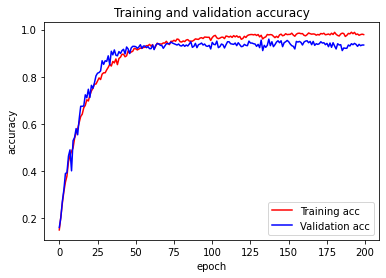

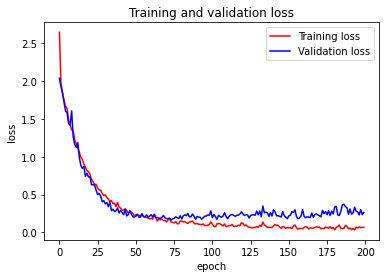

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:

final_loss, final_acc = model.evaluate([x_test_chroma,x_test_mfcc],y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

final_loss, final_acc = model.evaluate([x_val_chroma,x_val_mfcc], y_val, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))



23/23 [==============================] - 0s 7ms/step - loss: 0.4451 - accuracy: 0.9125
Final loss: 0.445092, final accuracy: 0.912500
23/23 [==============================] - 0s 7ms/step - loss: 0.5357 - accuracy: 0.9028
Final loss: 0.535680, final accuracy: 0.902778


In [ ]:
score = model.evaluate([x_train_chroma,x_train_mfcc], y_spec_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate([x_test_chroma,x_test_mfcc], y_test, verbose=0)
print("Test Accuracy: ", score[1])

score = model.evaluate([x_val_chroma,x_val_mfcc], y_val, verbose=0)
print("val Accuracy: ", score[1])

Training Accuracy:  1.0
Test Accuracy:  0.9125000238418579
val Accuracy:  0.9027777910232544


In [ ]:

final_loss, final_acc = model.evaluate([x_test_spectrogram,x_test_mfcc,x_test_mfcc],y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

final_loss, final_acc = model.evaluate([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))



ValueError: ignored

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate([x_train_spectrogram,x_train_chroma,x_train_mfcc], y_spec_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc], y_test, verbose=0)
print("Test Accuracy: ", score[1])

score = model.evaluate([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val, verbose=0)
print("val Accuracy: ", score[1])

Training Accuracy:  1.0
Test Accuracy:  0.9402777552604675
val Accuracy:  0.9347222447395325


In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate([x_train_spectrogram,x_train_chroma,x_train_mfcc], y_spec_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val, verbose=0)
print("Val Accuracy: ", score[1])

score = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc], y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9901041388511658
Val Accuracy:  0.8097222447395325
Testing Accuracy:  0.8374999761581421


In [ ]:

final_loss, final_acc = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc], y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

final_loss, final_acc = model.evaluate([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))



23/23 [==============================] - 1s 34ms/step - loss: 1.6173 - accuracy: 0.8375
Final loss: 1.617273, final accuracy: 0.837500
23/23 [==============================] - 1s 34ms/step - loss: 1.2769 - accuracy: 0.8097
Final loss: 1.276860, final accuracy: 0.809722


In [ ]:
model.load_weights("/content/drive/My Drive/UrbanSound8K/weights.best.basic_cnn.hdf5")

In [ ]:

# Evaluating the model on the training and testing set
score = model.evaluate([x_train_spectrogram,x_train_chroma,x_train_mfcc], y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc], y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  1.0
Testing Accuracy:  0.9381944537162781


In [ ]:
#print('test data', test_data)
preds = np.round(model.predict([x_test_spectrogram,x_test_chroma,x_test_mfcc]),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
#print('rounded test_labels', preds)

In [ ]:
Classes_List=['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']

In [ ]:
import sklearn.metrics as metrics
classification_metrics = metrics.classification_report(y_test, preds, target_names=Classes_List )
print(classification_metrics)

              precision    recall  f1-score   support

     neutral       0.86      0.88      0.87        49
        calm       0.89      0.96      0.92        95
       happy       0.95      0.98      0.96        94
         sad       0.93      0.89      0.91        95
       angry       0.99      0.93      0.96       107
     fearful       0.98      0.92      0.95        98
     disgust       0.95      0.96      0.95        91
   surprised       0.99      0.93      0.96        91

   micro avg       0.95      0.93      0.94       720
   macro avg       0.94      0.93      0.94       720
weighted avg       0.95      0.93      0.94       720
 samples avg       0.93      0.93      0.93       720



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [ ]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it's categorical variable
categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [ ]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [ ]:
#To get better visual of the confusion matrix:
from itertools import product
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


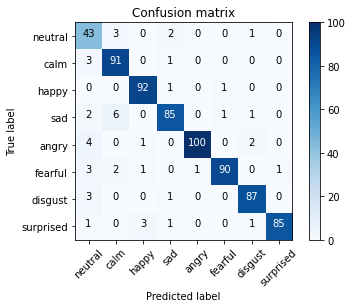

In [ ]:
plot_confusion_matrix(confusion_matrix, Classes_List)

Normalized confusion matrix


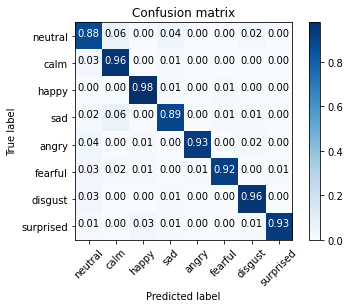

In [ ]:
plot_confusion_matrix(confusion_matrix, Classes_List,normalize=True)

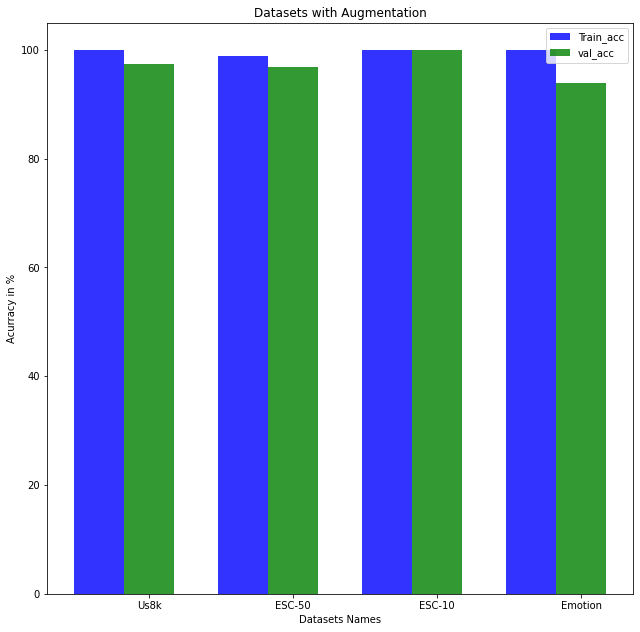

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# data to plot
n_groups = 4
Training_acc = (99.89, 98.78,99.93, 99.93)
Validation_acc = (97.46,96.89, 99.9,93.88)

# create plot
plt.rcParams["figure.figsize"] = (7, 5)
#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Training_acc, bar_width,
alpha=opacity,
color='b',
label='Train_acc')

rects2 = plt.bar(index + bar_width, Validation_acc, bar_width,
alpha=opacity,
color='g',
label='val_acc')

plt.xlabel('Datasets Names')
plt.ylabel('Acurracy in %')
plt.title('Datasets with Augmentation')
plt.xticks(index + bar_width, ('Us8k', 'ESC-50', 'ESC-10', 'Emotion'))
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5)
#plt.tight_layout()
plt.show()

python: 3.6.9
matplotlib: 3.2.2


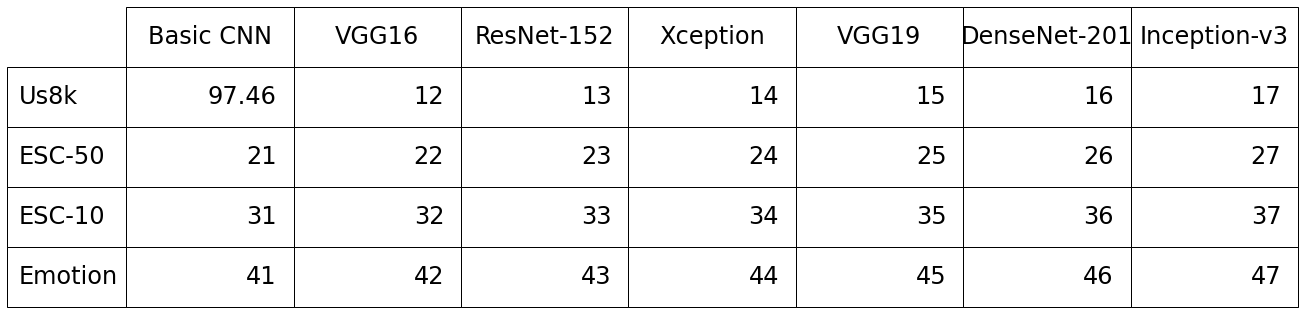

In [ ]:
import matplotlib.pyplot as plt
from platform import python_version as pythonversion
from matplotlib import __version__ as matplotlibversion
%matplotlib inline
print('python: '+pythonversion())
print('matplotlib: '+matplotlibversion)

fig = plt.figure()
ax = fig.add_subplot(111)
#y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]    
col_labels = ['Basic CNN', 'VGG16', 'ResNet-152','Xception','VGG19','DenseNet-201','Inception-v3']
row_labels = ['Us8k', 'ESC-50', 'ESC-10','Emotion']
table_vals = [[97.46, 12, 13,14,15,16,17], [21, 22, 23,24,25,26,27], [31, 32, 33,34,35,36,37],[41,42,43,44,45,46,47]]

# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(24)
the_table.scale(5, 5)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.08)

In [ ]:
from prettytable import PrettyTable 

# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Student Name", "Class", "Section", "Percentage"]) 

# Add rows 
myTable.add_row(["Leanord", "X", "B", "91.2 %"]) 
myTable.add_row(["Penny", "X", "C", "63.5 %"]) 
myTable.add_row(["Howard", "X", "A", "90.23 %"]) 
myTable.add_row(["Bernadette", "X", "D", "92.7 %"]) 
myTable.add_row(["Sheldon", "X", "A", "98.2 %"]) 
myTable.add_row(["Raj", "X", "B", "88.1 %"]) 
myTable.add_row(["Amy", "X", "B", "95.0 %"]) 

print(myTable)


+--------------+-------+---------+------------+
| Student Name | Class | Section | Percentage |
+--------------+-------+---------+------------+
|   Leanord    |   X   |    B    |   91.2 %   |
|    Penny     |   X   |    C    |   63.5 %   |
|    Howard    |   X   |    A    |  90.23 %   |
|  Bernadette  |   X   |    D    |   92.7 %   |
|   Sheldon    |   X   |    A    |   98.2 %   |
|     Raj      |   X   |    B    |   88.1 %   |
|     Amy      |   X   |    B    |   95.0 %   |
+--------------+-------+---------+------------+
